# Crops Price Prediction

**Group 2**

Student names:

1.Milton Kabute

2.Joyce Muthiani

3.Thorne Makau

4.Collin Cheruiyot

5.Kenneth Karanja

Instructor Name :Diana Mongina

# **Crops Price Prediction**

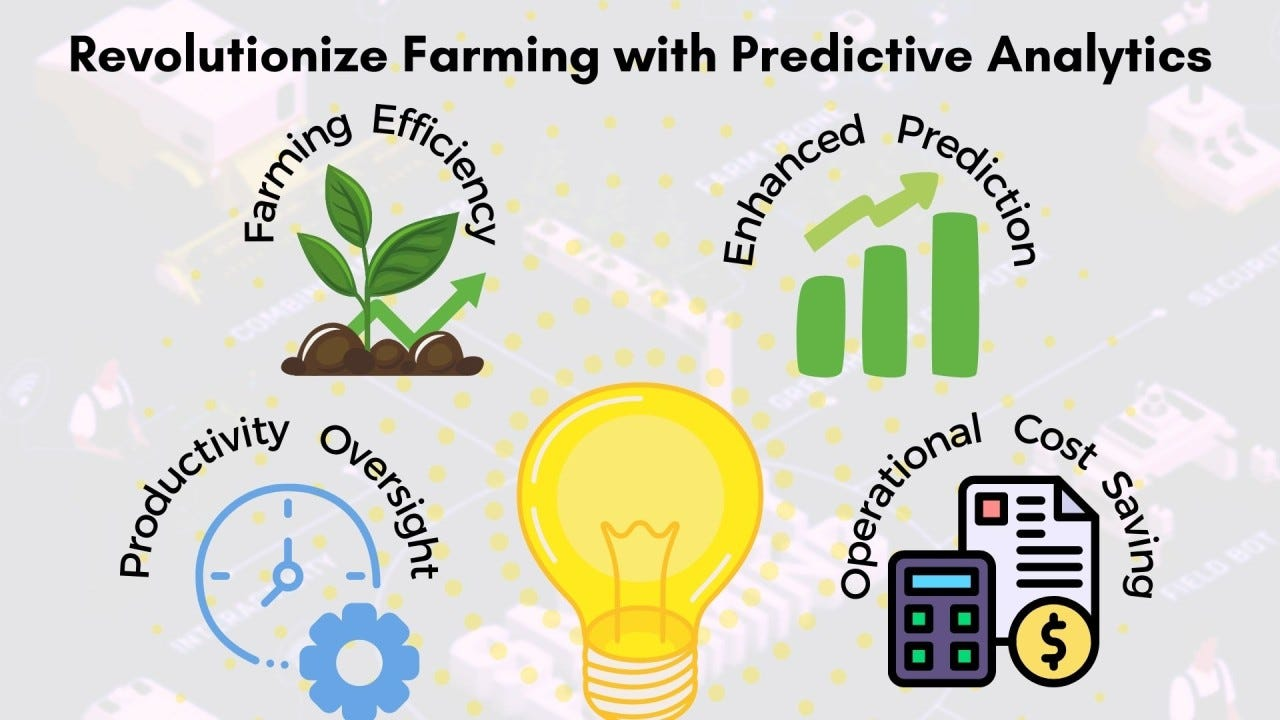

# **Introduction**

Datawise Solutions specializes in providing cutting-edge data analytics and consulting services to help enterprises of all sizes maximize the value of their data. With a team of expert data scientists, analysts, and consultants, we are dedicated to supporting organizations in gaining valuable insights, making informed decisions, and driving growth.

Our goal is straightforward: convert raw data into useful intelligence. Whether you want to streamline operations, better marketing techniques, enhance customer experiences, or drive innovation, we offer the expertise and technology to help you turn data challenges into opportunities.

From data collection and cleansing to advanced analytics and predictive modeling, we offer a comprehensive suite of services adapted to your specific needs. Our collaborative approach ensures that we grasp the exact business objectives and create solutions that produce demonstrable outcomes.

Datawise Solutions believes that the power of data is infinite. Let us be your reliable partner on the path to data-driven success.


## **Business Understanding**

According to a Business Daily article, Kenyan farmers earn less even though consumers pay more for food products as there is a huge disparity between farmers' price and consumer prices. Kenyan Farmers commodities prices are influenced by the inefficient market structure and the intermediaries between producers and consumers. It is noted that the market dynamics are dictated by the middlemen contributing to divergent wholesale and retail prices in the Kenyan Markets. However, there are external factors that have affected farmers' commodities prices such as subsidy schemes, currency fluctuation but farmers continue to earn less than the market price set in Kenyan stores and marketplaces.

According to the KARI report, the supply side factors, there is a decline in agricultural productivity, due to poor market access and market exploitation. for small-scale farmers Agriculture is a key contributor to the Kenyan GDP and provides livelihoods to a large part of the Kenyan Population. CBK Survey 2023 shows that the food commodities prices are down.In addition, the survey shows that foreign currency performance could be a factor in downward adjustment of the food prices.

For optimal business focus, we consider prioritizing the following crops: Maize, Beans, Onions,Wheat, Rice. These crops offer potential for profitability and market demand, making them strategic choices for your agricultural ventures and market exploitation. For small-scale farmers. Agriculture contributes significantly to Kenya's GDP and employs a big proportion of the Kenyan population.

The CBK Survey 2023 shows that food commodity prices are falling.Furthermore, the poll reveals that foreign currency performance may play a role in food price reductions.

For optimal business emphasis, we recommend emphasizing the following crops: maize, beans, onions, wheat, and rice. These crops have the potential for profitability and market demand, making them excellent selections for your agricultural ventures.


# **Objectives**
Enable farmer's and other stakeholders to anticipate the market trends of the crop produce, resource allocation, and market position

Enhance market transparency and price forecasting to farmers and industry policymakers.

Predict the price food products based on supply and demand of food products and market location

Market segmentation for the farmers  based on the prices, supply volumes, and location. - Best Market Location Place and Product to sell


## **Scope**
Developing machine learning models to forecast crop yield prices based on factors such as location, time, supply dynamics, and currency fluctuations.

Creating a user-friendly interface for farmers to access predictive pricing updates and market segmentation analysis.

Utilizing historical agricultural commodity prices and CBK currency data to develop accurate forecasting models.

Providing training and support to farmers in utilizing the price forecasting system effectively.

# **Stakeholders**

1.Kenya National Farmers Federation

2.Kenya Farmers Association

3.Government Agencies (e.g., Ministry of Agriculture, Central Bank of Kenya)

4.Agricultural Traders and Middlemen

5.Financial Institutions

6.Consumers

7.Agribusiness Farmers Association

# **Problem statement**
In Kenya, farmers often face significant disparities between the prices they receive for their crops and the prices consumers pay at marketplaces. This gap is primarily driven by inefficient market structures and the presence of intermediaries who exploit the lack of transparency in pricing. As a result, farmers struggle to earn fair prices for their produce, despite being a crucial component of the country's GDP and a source of livelihood for many. To address this challenge, there is a pressing need for a comprehensive price forecasting system that leverages historical and real-time data, supported by machine learning models. Such a system would empower farmers with predictive pricing updates, enhance market transparency, and enable informed decision-making for all stakeholders along the agricultural value chain.


## **Data Source**

**CBK**

**Ministry of Agriculture**

## **Data Understanding**


# usd_kes dataset
Date: This column represents the date of the recorded price data.

Price: This column represents the closing price of the asset on the corresponding date.

Open: This column represents the opening price of the asset on the corresponding date.

High: This column represents the highest price reached by the asset during the trading day.

Low: This column represents the lowest price reached by the asset during the trading day.

Vol.: This column possibly represents the trading volume of the asset on the corresponding date. However, in the provided sample, it seems to contain missing values (NaN).

Change %: This column likely represents the percentage change in the asset's price from the previous trading day to the current day.

# crop price dataset

Product: This column specifies the type of product being sold, Beans, dry maize, onion, rice

Market Location: This column indicates the location or name of the market where the product is being sold.

Wholesale Price: This column represents the price at which the product is sold in wholesale, typically in bulk quantities.

Retail Price: This column represents the price at which the product is sold to individual customers or consumers.

Supply Volume: This column likely indicates the quantity or volume of the product available for sale. NaN values indicate missing data.

County: This column specifies the county where the market is located.

Date: This column specifies the date of the recorded data.

###  **Libraries**

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine learning models and utilities
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
#from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer


# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing and feature engineering
from sklearn.preprocessing import OneHotEncoder

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
import datetime

# deployment
import streamlit as st
import joblib


### **Data Loading**

##### Usd dataset

In [3]:
# read the usd kes csv dataset
usd = pd.read_csv(r'usd_kes.csv')



In [4]:
# check first 5 rows of the dataset
print("First few rows of the usd_kes dataset:")

print(usd.head())

print("\nShape of the DataFrame:")

print(usd.shape)

print("\nInformation about the usd_kes dataset:")

print(usd.info())


First few rows of the usd_kes dataset:
         Date  Price   Open    High     Low Vol. Change %
0  04/25/2024  135.0  134.5  135.00  134.50  NaN    0.75%
1  04/24/2024  134.0  134.5  135.00  134.00  NaN    0.00%
2  04/23/2024  134.0  133.5  134.50  133.50  NaN    0.37%
3  04/22/2024  133.5  133.5  134.00  133.00  NaN    0.38%
4  04/19/2024  133.0  133.0  133.55  132.75  NaN    0.19%

Shape of the DataFrame:
(1271, 7)

Information about the usd_kes dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1271 non-null   object 
 1   Price     1271 non-null   float64
 2   Open      1271 non-null   float64
 3   High      1271 non-null   float64
 4   Low       1271 non-null   float64
 5   Vol.      933 non-null    object 
 6   Change %  1271 non-null   object 
dtypes: float64(4), object(3)
memory usage: 69.6+ KB
None


In [5]:
# stastical summary of the usd dataset
usd.describe()

,Price,Open,High,Low
count,1271.000000,1271.000000,1271.000000,1271.000000
mean,118.033934,118.080551,118.304590,117.874168
std,15.946507,16.017640,16.053045,15.940656
min,100.350000,100.300000,100.550000,100.300000
25%,107.125000,107.050000,107.350000,106.895000
50%,111.300000,111.300000,111.550000,111.150000
75%,124.400000,124.475000,124.575000,124.325000
max,163.000000,163.500000,163.500000,162.650000


Price: Mean ≈ 118.03, Min = 100.35, Max = 163.00

Open: Mean ≈ 118.08, Min = 100.30, Max = 163.50

High: Mean ≈ 118.30, Min = 100.55, Max = 163.50

Low: Mean ≈ 117.87, Min = 100.30, Max = 162.65

The DataFrame consists of 1271 rows and 7 columns.
This indicates that there are 1271 entries in the DataFrame, each representing data for a specific date, and 7 columns representing different attributes of the asset

Types: Float64 for numerical (Price, Open, High, Low), Object for non-numerical (Date, Vol., Change %)
Missing Data: 'Vol.' column has 933 non-null entries out of 1271

In [6]:
# drop these irrelevant columns
usd.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'], inplace=True)
usd


,Date,Price
0,04/25/2024,135.00
1,04/24/2024,134.00
2,04/23/2024,134.00
3,04/22/2024,133.50
4,04/19/2024,133.00
...,...,...
1266,05/01/2019,101.15
1267,04/30/2019,101.15
1268,04/29/2019,101.30
1269,04/26/2019,101.50


Dropped 5 columns that aren't vital in wholesale prices of products and modelling of this crop price prediction

In [7]:
print(usd.head())
print(usd.tail())

         Date  Price
0  04/25/2024  135.0
1  04/24/2024  134.0
2  04/23/2024  134.0
3  04/22/2024  133.5
4  04/19/2024  133.0
            Date   Price
1266  05/01/2019  101.15
1267  04/30/2019  101.15
1268  04/29/2019  101.30
1269  04/26/2019  101.50
1270  04/25/2019  101.60


The dataset contains Price data spanning from May 1, 2019, to April 25, 2024. Prices range from 101.15 to 135.0 units, with fluctuations over time.

In [8]:
# renaming price columns to usd_rate
usd.rename(columns={'Price': 'usd_rate'}, inplace=True)
print(usd)

            Date  usd_rate
0     04/25/2024    135.00
1     04/24/2024    134.00
2     04/23/2024    134.00
3     04/22/2024    133.50
4     04/19/2024    133.00
...          ...       ...
1266  05/01/2019    101.15
1267  04/30/2019    101.15
1268  04/29/2019    101.30
1269  04/26/2019    101.50
1270  04/25/2019    101.60

[1271 rows x 2 columns]


#### check missing values usd dataset

In [9]:
# check missing values in the usd dataset
usd.isnull().sum()


Date        0
usd_rate    0
dtype: int64

#### Load crop prices dataset

In [10]:
# read crop prices csv dataset
data = pd.read_csv(r"crop_prices.csv")


In [11]:
data.describe()

,Wholesale Price,Retail Price,Supply Volume
count,80249.000000,70587.000000,5.966200e+04
mean,89.749014,119.259041,9.238390e+03
std,485.590598,207.261003,4.205870e+05
min,0.010000,0.010000,0.000000e+00
25%,40.000000,70.000000,8.400000e+02
50%,69.570000,100.000000,2.400000e+03
75%,110.000000,150.000000,5.800000e+03
max,120000.000000,17100.000000,1.000000e+08


#### Check missing values, datatype and number of columns, Unique Products

Check missing values in the dataset, based by number of the columns, unique products

In [12]:
# explore the datatype in the dataset, missing values, number of columns
# columns
data.columns
data.info()
# missing values
data.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87859 entries, 0 to 87858
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product          87859 non-null  object 
 1   Market Location  87859 non-null  object 
 2   Wholesale Price  80249 non-null  float64
 3   Retail Price     70587 non-null  float64
 4   Supply Volume    59662 non-null  float64
 5   County           87859 non-null  object 
 6   Date             87859 non-null  object 
dtypes: float64(3), object(4)
memory usage: 4.7+ MB


Product                0
Market Location        0
Wholesale Price     7610
Retail Price       17272
Supply Volume      28197
County                 0
Date                   0
dtype: int64

#### check unique values in the dataset

In [13]:
## check unique values in the dataset
# Iterate through all  column and print counts of unique values in the columns
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Counts of unique values in column '{column}':")
    print(value_counts)
    print()


Counts of unique values in column 'Product':
Product
Dry Maize    28505
Onion        27887
Rice         16748
Bean         14719
Name: count, dtype: int64

Counts of unique values in column 'Market Location':
Market Location
Nakuru Wakulima              5780
Eldoret Main                 2787
Kibuye                       2205
Aram                         2183
Nairobi Wakulima             2143
                             ... 
Marsabit modern market          2
Nyabite                         1
Mouwarak Livestock Market       1
Bangale Market                  1
Merti  Livestock Market         1
Name: count, Length: 252, dtype: int64

Counts of unique values in column 'Wholesale Price':
Wholesale Price
50.00      3940
100.00     3736
80.00      3252
60.00      3191
40.00      2816
           ... 
8750.00       1
23.78         1
22.11         1
105.67        1
366.00        1
Name: count, Length: 1637, dtype: int64

Counts of unique values in column 'Retail Price':
Retail Price
100.00    69

### Handling Missing Values on Crop Prices Dataset & drop retail price column
Wholesale Column, Supply Volume by imputing median values based on the product, location either the marketplace and county level.

In [14]:
# replace missing values on the wholesale price with values on the retail price
for i in range(len(data)):
  if pd.isna(data.loc[i, 'Wholesale Price']):
    data.loc[i, 'Wholesale Price'] = data.loc[i, 'Retail Price']
# impute missing values on wholesale price column  median by product and market location
# Group data by product and market location
grouped_data = data.groupby(['Product', 'Market Location'])

data['Wholesale Price'] = grouped_data['Wholesale Price'].transform(lambda x: x.fillna(x.median()))
# impute missing values on the supply volume based by the county
supply_data = data.groupby(['Product', 'County'])
# impute median values in missing values in supply volume column
data['Supply Volume'] = supply_data['Supply Volume'].transform(lambda x: x.fillna(x.median()))
data



,Product,Market Location,Wholesale Price,Retail Price,Supply Volume,County,Date
0,Bean,Mukuyu Market,111.11,122.22,360.0,Muranga,4/24/2024
1,Bean,Ngurubani Market,111.11,135.00,1700.0,Kirinyaga,4/23/2024
2,Bean,Kerugoya,182.22,240.00,1500.0,Kirinyaga,4/23/2024
3,Bean,Molo,250.00,250.00,120.0,Nakuru,4/23/2024
4,Bean,Maua,133.33,150.00,2250.0,Meru,4/23/2024
...,...,...,...,...,...,...,...
87854,Onion,Kibuye,21.54,NaN,1500.0,Kisumu,02/01/2005
87855,Onion,Wath Ong'er,30.77,NaN,1890.0,Migori,02/01/2005
87856,Onion,Karatina,20.00,NaN,2400.0,Nyeri,02/01/2005
87857,Onion,Nakuru Wakulima,26.92,NaN,1500.0,Nakuru,02/01/2005


#### drop retail price column

In [15]:
# drop retail price column
data.drop('Retail Price', axis=1, inplace=True)
# check missing values
data.isnull().sum()

Product            0
Market Location    0
Wholesale Price    0
Supply Volume      0
County             0
Date               0
dtype: int64

#### Dataset data types

In [16]:
data.dtypes

Product             object
Market Location     object
Wholesale Price    float64
Supply Volume      float64
County              object
Date                object
dtype: object

#### Convert datatime format

Convert dates to datetime format for essential in predicting the wholesale prices of the crops in the market locations, coumties as prices vary from location. In addtion, its conversion will be vital in predicting the wholesale prices

In [17]:
# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Display the sorted dataframe
print(data)

# usd dataframe
usd['Date'] = pd.to_datetime(usd['Date'])
print(usd)


      Product   Market Location  Wholesale Price  Supply Volume     County  \
0        Bean     Mukuyu Market           111.11          360.0    Muranga   
1        Bean  Ngurubani Market           111.11         1700.0  Kirinyaga   
2        Bean          Kerugoya           182.22         1500.0  Kirinyaga   
3        Bean              Molo           250.00          120.0     Nakuru   
4        Bean              Maua           133.33         2250.0       Meru   
...       ...               ...              ...            ...        ...   
87854   Onion            Kibuye            21.54         1500.0     Kisumu   
87855   Onion       Wath Ong'er            30.77         1890.0     Migori   
87856   Onion          Karatina            20.00         2400.0      Nyeri   
87857   Onion   Nakuru Wakulima            26.92         1500.0     Nakuru   
87858   Onion          Kongowea            32.31        10800.0    Mombasa   

            Date  
0     2024-04-24  
1     2024-04-23  
2     

#### Drop Rows Filtered by Dates

Drop the rows by dates to keep the past 5 years values in the dataset, it is essential as we will use the latest data for training our models performance and reduce run time of our models

In [18]:
# Define the start and end dates for the range to drop
start_date = '2005-02-01'
end_date = '2019-04-24'

# Drop rows with dates between the start and end dates
data = data[(data['Date'] < start_date) | (data['Date'] > end_date)]

# Display the updated DataFrame
print(data)
# Display the sorted dataframe
print(data)

# usd dataframe
usd['Date'] = pd.to_datetime(usd['Date'])
print(usd)

      Product   Market Location  Wholesale Price  Supply Volume     County  \
0        Bean     Mukuyu Market           111.11          360.0    Muranga   
1        Bean  Ngurubani Market           111.11         1700.0  Kirinyaga   
2        Bean          Kerugoya           182.22         1500.0  Kirinyaga   
3        Bean              Molo           250.00          120.0     Nakuru   
4        Bean              Maua           133.33         2250.0       Meru   
...       ...               ...              ...            ...        ...   
80522   Onion       Kathonzweni            40.00         5200.0    Makueni   
80523   Onion          Kongowea            64.29          840.0    Mombasa   
80524   Onion      Elwak Market            66.67         1200.0    Mandera   
80525   Onion           Gikomba            60.00         3000.0    Nairobi   
80526   Onion       Wath Ong'er             0.05          500.0     Migori   

            Date  
0     2024-04-24  
1     2024-04-23  
2     

### Merge 2 Datasets , usd_kes & Crop Price csv

Merging the  usd_kes and crop price dataset. This is to create a new dataframe that will contain all features for training our model to predict crop wholesale prices in all markets based by location, prevaling foreign exchange rates as they affect consumer purchasing power, thus to levarage on it on setting the best crop prices in the market based on external factors such fluctuation of usd/kes, supply volume, location and county.

## Data Exploration

In [19]:
# Merge the dataframes on the 'Date' column
data_usd = pd.merge(data, usd, on='Date', how='outer')

#### % Missing Values per Column

Missing Values Summary:
                 Missing Values  Percentage of Missing Values
Product                     533                      0.723811
Market Location             533                      0.723811
Wholesale Price             533                      0.723811
Supply Volume               533                      0.723811
County                      533                      0.723811
Date                          0                      0.000000
usd_rate                   8032                     10.907412


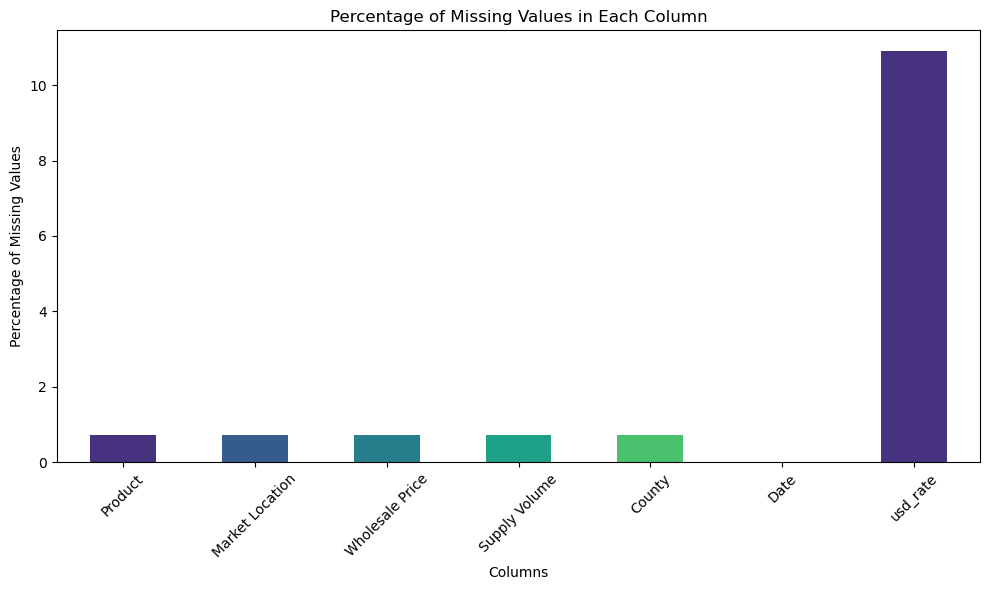

In [20]:
# Check missing values in the data_usd DataFrame
missing_values_count = data_usd.isnull().sum()
total_cells = data_usd.size
total_missing = missing_values_count.sum()

# Count missing values per column
missing_values_count_per_column = data_usd.isnull().sum()

# Calculate percentage of missing values per column
missing_values_percentage_per_column = (missing_values_count_per_column / len(data_usd)) * 100

# Combine the counts and percentages into a DataFrame for easier interpretation
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values_count_per_column,
    'Percentage of Missing Values': missing_values_percentage_per_column
})

print("Missing Values Summary:")
print(missing_data_summary)
# Plot the percentage of missing values per column
plt.figure(figsize=(10, 6))
missing_data_summary['Percentage of Missing Values'].plot(kind='bar', color=sns.palettes.mpl_palette('viridis'))
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Drop rows with missing values

In [21]:
# Remove rows with missing values
data_usd_cleaned = data_usd.dropna()

# Display the cleaned dataframe
print(data_usd_cleaned)

# Remove duplicate rows
data_cleaned = data_usd_cleaned.drop_duplicates()

# Display the cleaned dataframe
print(data_cleaned)

data_cleaned.info()

         Product          Market Location  Wholesale Price  Supply Volume  \
0           Bean            Mukuyu Market           111.11          360.0   
1      Dry Maize          Nakuru Wakulima            60.00         1300.0   
2      Dry Maize          Nakuru Wakulima            35.56         1300.0   
3      Dry Maize          Nakuru Wakulima            40.00         1300.0   
4      Dry Maize  Chepterit Market  Nandi            44.44         4500.0   
...          ...                      ...              ...            ...   
73075      Onion                  Gikomba            60.00         3000.0   
73076      Onion              Wath Ong'er             0.05          500.0   
73084  Dry Maize                    Kagio            50.00         4500.0   
73085       Rice                    Kagio           150.00         2400.0   
73086      Onion                    Kagio           100.00         3500.0   

          County       Date  usd_rate  
0        Muranga 2024-04-24    134.

#### Unique values in the dataset

Product               4
Market Location     246
Wholesale Price    1537
Supply Volume      1381
County               48
Date                738
usd_rate            488
dtype: int64

Unique Values for Categorical Columns:
Product: 4 unique values
Market Location: 246 unique values
County: 48 unique values


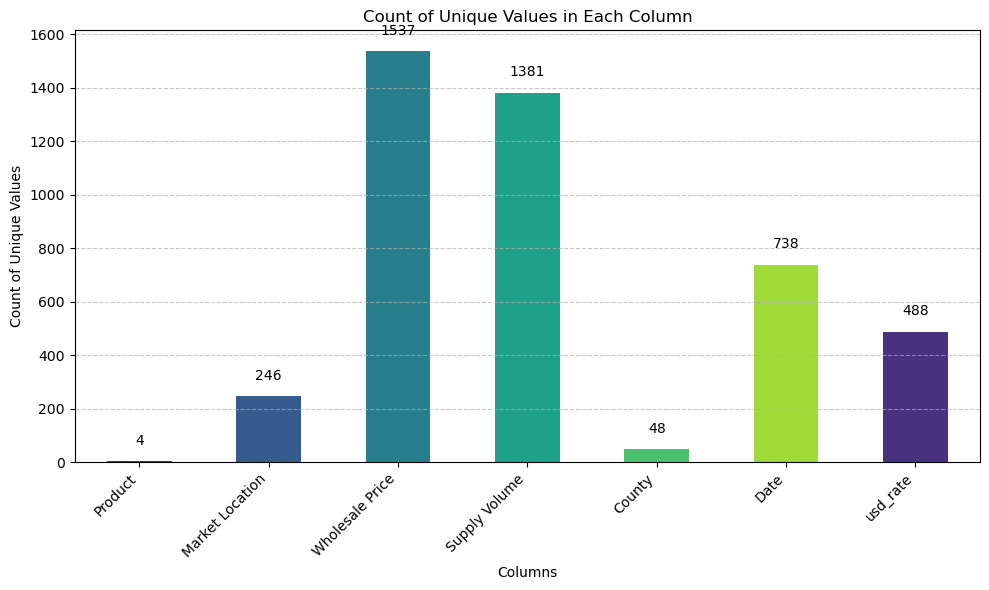

In [22]:
# check unique values in the entire dataset
print(data_cleaned.nunique())

print("\nUnique Values for Categorical Columns:")
for col in data_cleaned.select_dtypes(include=['object']):
    print(f"{col}: {data_cleaned[col].nunique()} unique values")

# Calculate the count of unique values in each column
unique_value_counts = data_cleaned.nunique()

# Plot the counts using a bar plot
plt.figure(figsize=(10, 6))
unique_value_counts.plot(kind='bar', color=sns.palettes.mpl_palette('viridis'))
plt.title('Count of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of Unique Values')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# bars with the count values
for i, count in enumerate(unique_value_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

Product: This column likely represents different types of products. With 4 unique values - bean, rice, onions, dry maize

Market Location: This column probably indicates the locations of different markets. With 246 unique values, it implies that there are 246 different market locations.

County: This column likely represents different counties. With 48 unique values, it suggests that there are 48 distinct counties or regions in the dataset. However, it is evident there are more counties that then the usual number of counties.

#### Drop Test County

Filter the Test County, used in testing the data entry by enumerators, the Test county will be irrelevant in our analysis, as these are tests entries counducted before the actual data collection takes place in all agricultural maket in the counties.

In [23]:
# filter county column if the county has word test, and drop the completely
# drop rows with test counties
filtered_df = data_cleaned[data_cleaned["County"].str.contains("test", case=False)]

# Print the filtered DataFrame
print(filtered_df)

# Drop the rows containing "test" in the "County" column
data_cleaned = data_cleaned.drop(filtered_df.index)

# Display the updated DataFrame
print(data_cleaned)


         Product Market Location  Wholesale Price  Supply Volume County  \
1875   Dry Maize     test market            55.56          100.0   test   
11732      Onion     test market           120.00         2000.0   test   
16840  Dry Maize     test market            68.89           90.0   test   
16841  Dry Maize     test market            68.89        10000.0   test   
16843  Dry Maize     test market            56.36        10000.0   test   
...          ...             ...              ...            ...    ...   
59904       Rice     test market           150.00         2000.0   test   
59934      Onion     test market            80.00         2000.0   test   
59966       Bean     test market           111.11         1800.0   test   
59989  Dry Maize     test market            31.11         3600.0   test   
60029       Rice     test market            70.00         1200.0   test   

            Date  usd_rate  
1875  2024-02-20    145.00  
11732 2023-07-06    140.85  
16840 2023-0

#### Products Distribution and  Counties

Visualisation of Unique values in the dataset based on the Products, Market location, counties.

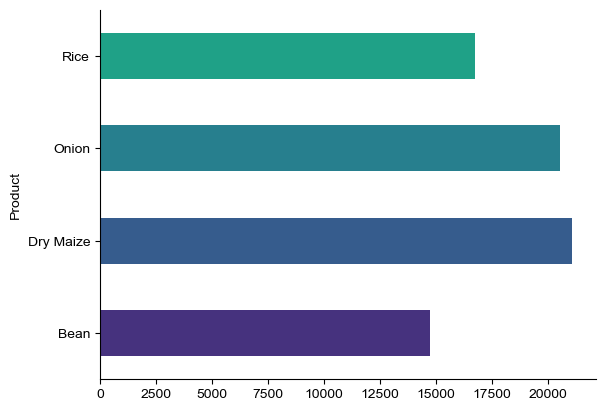

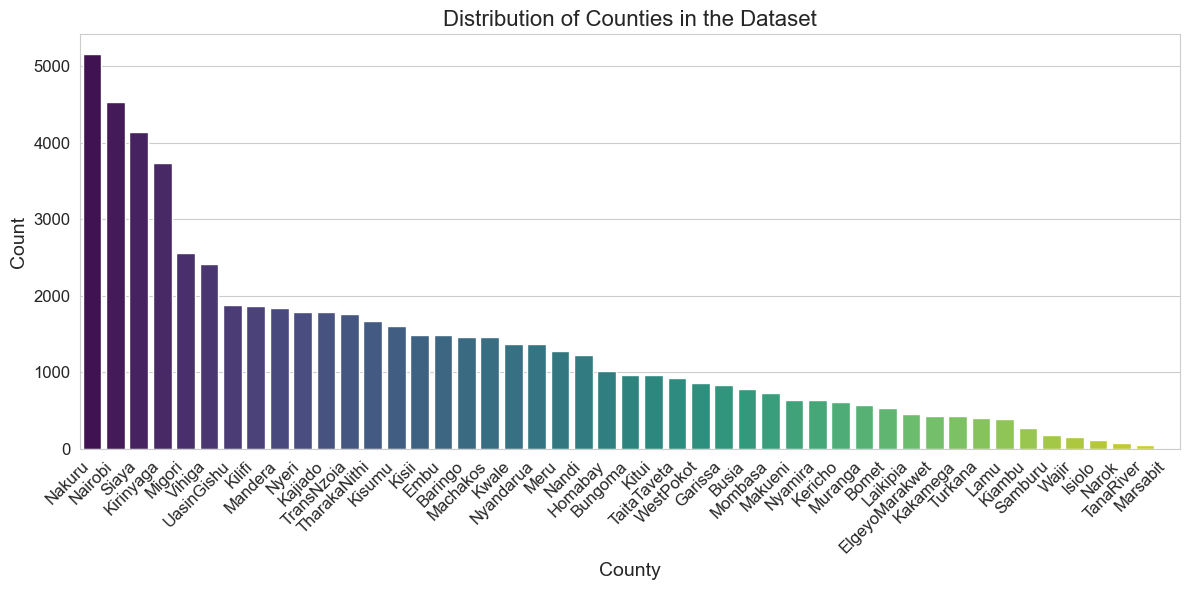

In [24]:
# plot the distribution of the products
#title Product
data.groupby('Product').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Set the style for the plots
sns.set_style("whitegrid")
# Distribution of counties
plt.figure(figsize=(12, 6))
sns.countplot(x='County', data=data_cleaned, palette='viridis', order=data_cleaned['County'].value_counts().index)
plt.title('Distribution of Counties in the Dataset', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Average Wholesale price of the Products

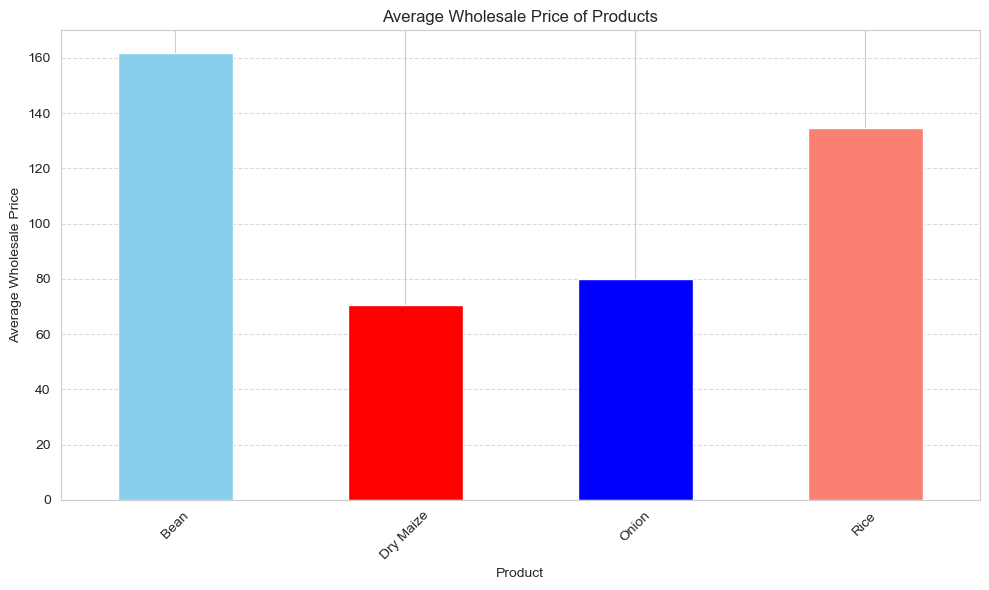

In [25]:
# Group by product and calculate the average wholesale price
average_prices = data.groupby('Product')['Wholesale Price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color=['skyblue','red','blue','salmon'])
plt.title('Average Wholesale Price of Products')
plt.xlabel('Product')
plt.ylabel('Average Wholesale Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bean average price is higher than the other crops goin at 160 ksh with dry maize to be the lowest at an average of 70 ksh.

## Statistical summary

The statistics provide insights into the distribution and central tendency of the numerical variables in the dataset, helping to understand the range and variability of the data.

In [26]:
# statistical summary of the dataset
summary_stats = data_cleaned.describe()
print(summary_stats)


       Wholesale Price  Supply Volume                           Date  \
count     60969.000000   6.096900e+04                          60969   
mean        107.552343   8.650964e+03  2022-08-26 02:09:44.205087744   
min           0.010000   0.000000e+00            2021-05-24 00:00:00   
25%          54.550000   9.000000e+02            2021-12-07 00:00:00   
50%          80.000000   2.500000e+03            2022-08-29 00:00:00   
75%         130.000000   6.000000e+03            2023-04-24 00:00:00   
max      120000.000000   1.000000e+08            2024-04-24 00:00:00   
std         558.242143   4.158682e+05                            NaN   

           usd_rate  
count  60969.000000  
mean     123.376619  
min      107.350000  
25%      112.750000  
50%      119.900000  
75%      133.000000  
max      163.000000  
std       13.793940  


## Average Wholesale Products Price

Visualising the average wholesale price per product and visualizing it using a bar chart

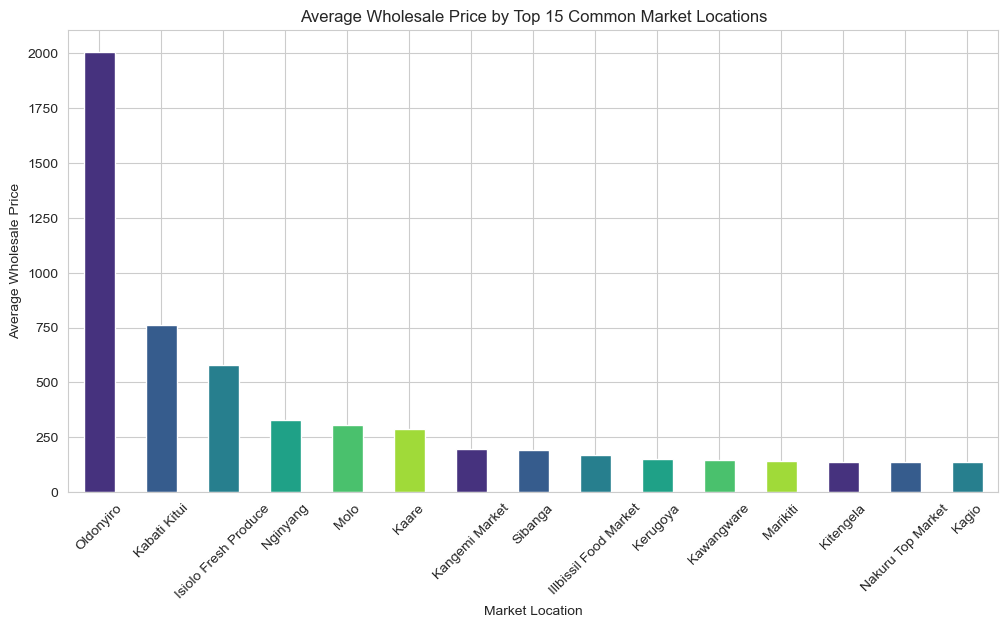

In [28]:
# Plot comparison of average wholesale price by market location
average_wholesale_price = data_cleaned.groupby('Market Location')['Wholesale Price'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
average_wholesale_price.plot(kind='bar', color=sns.color_palette('viridis'))
plt.title('Average Wholesale Price by Top 15 Common Market Locations')
plt.xlabel('Market Location')
plt.ylabel('Average Wholesale Price')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

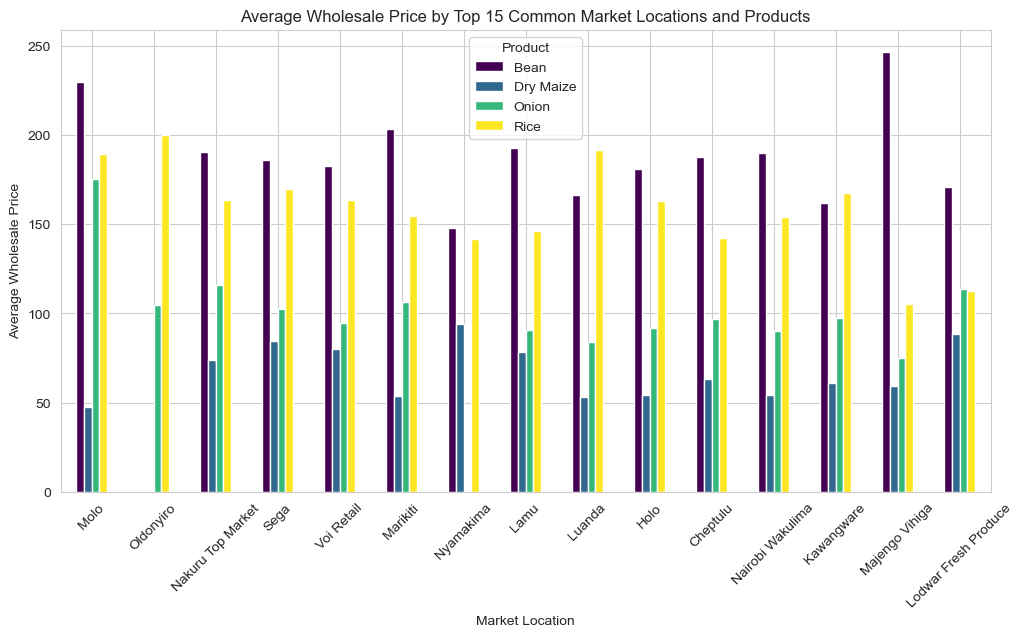

In [59]:
# calculate average wholesale price
average_wholesale_price_product = data_cleaned.groupby(['Market Location', 'Product'])['Wholesale Price'].mean().sort_values(ascending=False)

# top 15 common market locations
top_market_locations = average_wholesale_price_product.groupby('Market Location').mean().sort_values(ascending=False).head(15).index

# Filtering data
average_wholesale_price_product_filtered = average_wholesale_price_product.loc[top_market_locations]

# Plotting the comparison
plt.figure(figsize=(12, 6))
average_wholesale_price_product_filtered.unstack().plot(kind='bar', figsize=(12,6), colormap='viridis')
plt.title('Average Wholesale Price by Top 15 Common Market Locations and Products')
plt.xlabel('Market Location')
plt.ylabel('Average Wholesale Price')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.show()


## Top 10 Common Market Location

Visualizing the distribution of the top 10 common market locations in the dataset using a bar plot

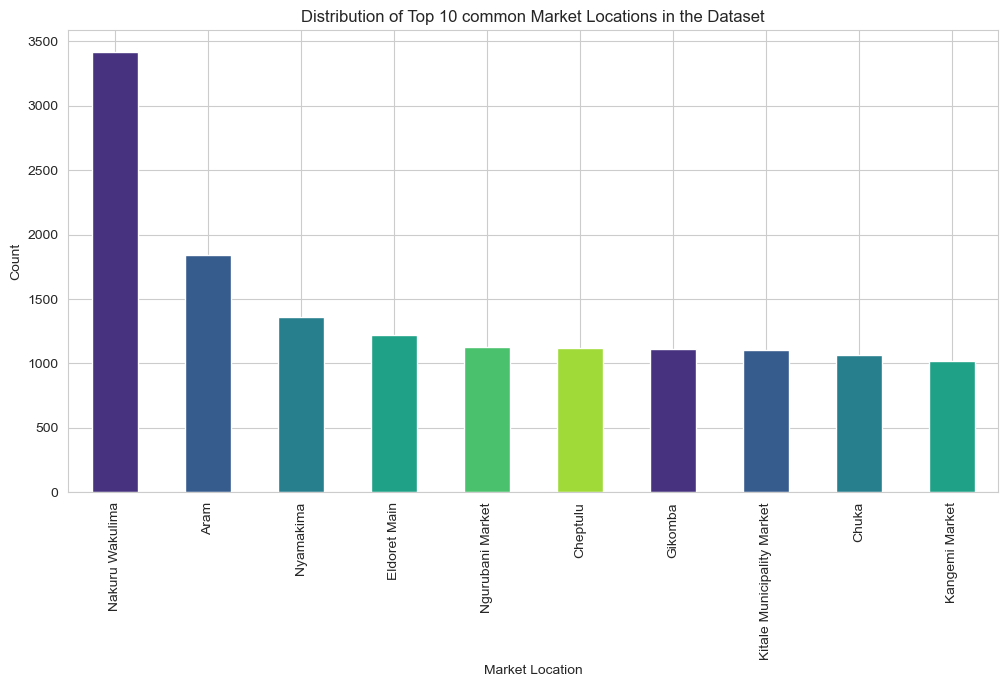

In [29]:
# Get the top 10 common market locations
top_10_market_locations = data_cleaned['Market Location'].value_counts().head(10)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
top_10_market_locations.plot(kind='bar', ax=ax, color=sns.color_palette('viridis'))

# Set labels and title
ax.set_title('Distribution of Top 10 common Market Locations in the Dataset')
ax.set_xlabel('Market Location')
ax.set_ylabel('Count')

plt.show()


## Correlation Heatmap

Correlation Matrix:
                 usd_rate  Wholesale Price  Supply Volume
usd_rate         1.000000         0.031122      -0.005513
Wholesale Price  0.031122         1.000000      -0.001058
Supply Volume   -0.005513        -0.001058       1.000000


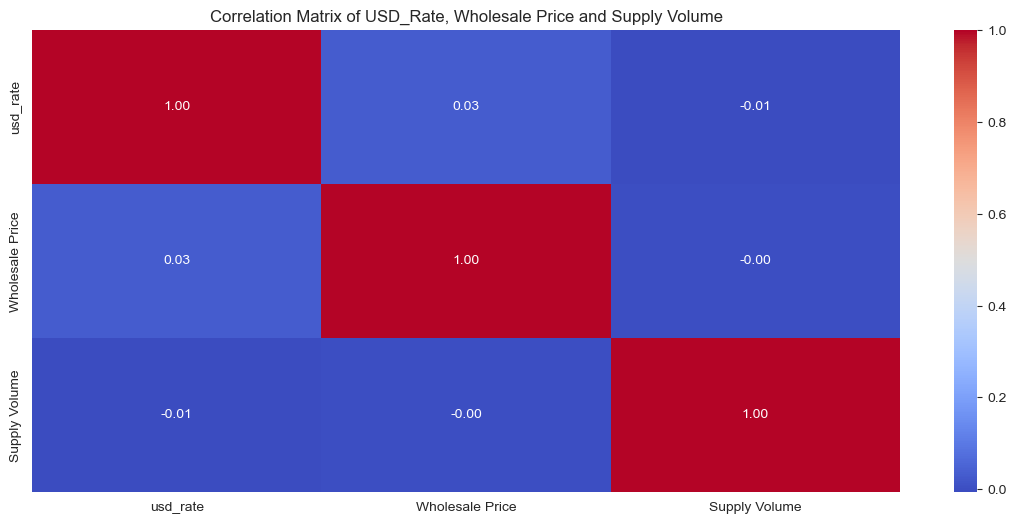

In [30]:
# correlation heatmap between usd_rate and wholesale price of all products
# Calculate the correlation matrix
correlation_matrix = data_cleaned[['usd_rate', 'Wholesale Price', 'Supply Volume']].corr()
# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm")

# title and show the plot
plt.title("Correlation Matrix of USD_Rate, Wholesale Price and Supply Volume")
plt.show()

The correlation coefficient between usd_rate and Wholesale Price is approximately 0.031, indicating a very weak positive correlation.
The correlation coefficient between Supply Volume and Wholesale Price is approximately -0.001, suggesting a very weak negative correlation.
Values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate a weak correlation.

**usd_rate vs. Wholesale Price**

Correlation coefficient: 0.031122
There is a very weak positive correlation (close to zero) between the usd/kes rate and the wholesale price. This suggests that changes in the USD exchange rate have a minimal impact on the wholesale price.

**usd_rate vs. Supply Volume**

Correlation coefficient: -0.005513
There is a very weak negative correlation between the USD/kes exchange rate (usd_rate) and the supply volume. This indicates that changes in the USD exchange rate have a minimal impact on the supply volume.

**Wholesale Price vs. Supply Volume**

Correlation coefficient: -0.001058
There is a very weak negative correlation (close to zero) between the wholesale price and the supply volume. This suggests that changes in the wholesale price have a minimal impact on the supply volume.


## Boxplots

Boxplot displays the distribution of values for supply volume and wholesale price with box plots

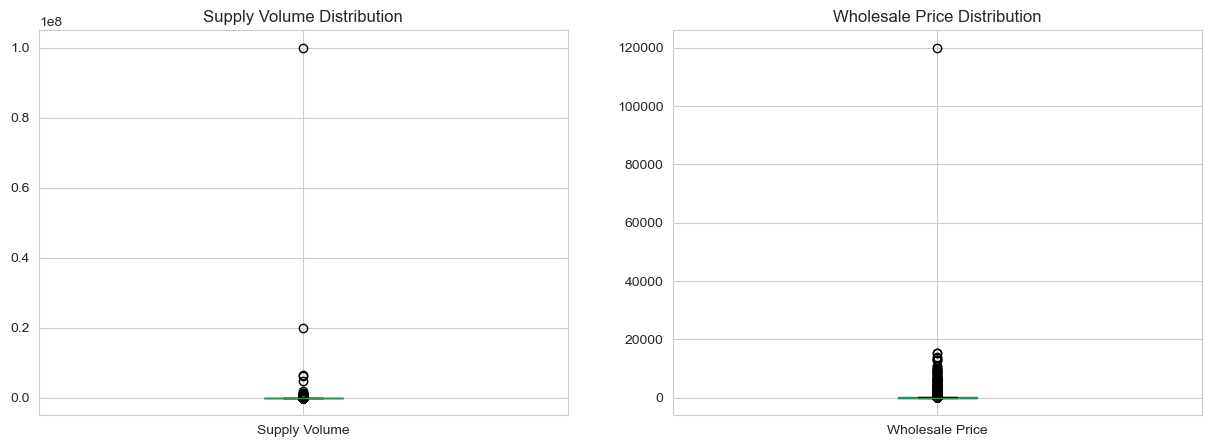

In [31]:
# visualise distribution of values on supply volume and wholesale price with box plots
# Create boxplots for Supply Volume and Wholesale Price
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

data_cleaned.boxplot(column='Supply Volume', ax=axs[0])
axs[0].set_title('Supply Volume Distribution')

data_cleaned.boxplot(column='Wholesale Price', ax=axs[1])
axs[1].set_title('Wholesale Price Distribution')

plt.show()


There are outliers in the wholesale price column, but supply volume could due to the supply dynamics of the farmers crops yield, but the wholesale prices are above the common market wholesale prices of the products that ar unrealistic, we have products at 1200000 ksh, therfore these will affect the accuracy of the model.

## Outliers

Outliers for Supply Volume
There are 5,185 outlier observations identified in the 'Supply Volume' column.
These outliers represent unusually high or low values compared to the rest of the data.
Each outlier entry includes details such as the product, market location, wholesale price, supply volume, county, date, and USD exchange rate.
Outliers for Wholesale Price:
There are 673 outlier observations detected in the 'Wholesale Price' column.
These outliers indicate significantly high or low prices compared to the majority of the data.
Each outlier record provides information like the product, market location, wholesale price, supply volume, county, date, and USD exchange rate.

In [32]:
# interquartile range (IQR) for the Supply Volume column
Q1_volume = data_cleaned['Supply Volume'].quantile(0.25)
Q3_volume = data_cleaned['Supply Volume'].quantile(0.75)
IQR_volume = Q3_volume - Q1_volume

# lower and upper bounds for outliers detection for Supply Volume
lower_bound_volume = Q1_volume - 1.5 * IQR_volume
upper_bound_volume = Q3_volume + 1.5 * IQR_volume

# Find outliers for Supply Volume using the lower and upper bounds
outliers_volume = data_cleaned[(data_cleaned['Supply Volume'] < lower_bound_volume) | (data_cleaned['Supply Volume'] > upper_bound_volume)]

# interquartile range (IQR) for the Wholesale Price column
Q1_price = data_cleaned['Wholesale Price'].quantile(0.25)
Q3_price = data_cleaned['Wholesale Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# lower and upper bounds for outliers detection for Wholesale Price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Find outliers for Wholesale Price using the lower and upper bounds
outliers_price = data_cleaned[(data_cleaned['Wholesale Price'] < lower_bound_price) | (data_cleaned['Wholesale Price'] > upper_bound_price)]

# Print the outliers for Supply Volume
print("Outliers for Supply Volume:")
print(outliers_volume)

# Print the outliers for Wholesale Price
print("\nOutliers for Wholesale Price:")
print(outliers_price)

# Total number of data points
total_data_points = len(data_cleaned)

# Number of outliers for Supply Volume and Wholesale Price
num_outliers_volume = len(outliers_volume)
num_outliers_price = len(outliers_price)

# Calculate the percentage of outliers
percentage_outliers_volume = (num_outliers_volume / total_data_points) * 100
percentage_outliers_price = (num_outliers_price / total_data_points) * 100

# Print the percentages
print(f"Percentage of outliers for Supply Volume: {percentage_outliers_volume:.2f}%")
print(f"Percentage of outliers for Wholesale Price: {percentage_outliers_price:.2f}%")

Outliers for Supply Volume:
         Product   Market Location  Wholesale Price  Supply Volume  \
37     Dry Maize              Maua            33.33        27000.0   
45     Dry Maize           Kapkwen            35.56        46800.0   
65         Onion       Kathonzweni           200.00        14000.0   
94     Dry Maize            Keroka            35.56        65000.0   
96     Dry Maize  Chepsonoi Market            38.89        16500.0   
...          ...               ...              ...            ...   
72957      Onion          Karatina            30.00        40000.0   
72964      Onion             Chuka            33.33        20000.0   
72996      Onion             Kagio            35.00        17500.0   
72998      Onion              Tawa           333.33        20000.0   
73034      Onion          Karatina            34.00        15000.0   

             County       Date  usd_rate  
37             Meru 2024-04-23     134.0  
45            Bomet 2024-04-23     134.0  
65

Percentage of outliers for Supply Volume: 8.50%

This means that 8.50% of the data points in the Supply Volume column are considered outliers based on the criteria used for outlier detection.
Percentage of outliers for Wholesale Price: 1.10%

Similarly, 1.10% of the data points in the Wholesale Price column are considered outliers based on the same outlier detection criteria.

## Drop crop prices based on the current Kenyan food prices

Based on the domain knowledge of the market prices of products in Kenya, we dropped values that are extremly lower, and high than the common wholesale prices

In [33]:
# Count the number of rows with wholesale prices above 500
count_above_500 = len(data[data['Wholesale Price'] > 500])

# Count the number of rows with wholesale prices below 20
count_below_20 = len(data[data['Wholesale Price'] < 20])

# Calculate the total number of rows in the dataset
total_rows = len(data)

# Calculate the percentage of rows with wholesale prices above 500
percentage_above_500 = (count_above_500 / total_rows) * 100

# Calculate the percentage of rows with wholesale prices below 20
percentage_below_20 = (count_below_20 / total_rows) * 100

# Print the percentages
print(f"Percentage of wholesale prices above 500: {percentage_above_500:.2f}%")
print(f"Percentage of wholesale prices below 20: {percentage_below_20:.2f}%")


data_cleaned = data_cleaned[(data_cleaned['Wholesale Price'] > 20) & (data_cleaned['Wholesale Price'] < 500)]
data_cleaned

Percentage of wholesale prices above 500: 0.34%
Percentage of wholesale prices below 20: 1.33%


,Product,Market Location,Wholesale Price,Supply Volume,County,Date,usd_rate
0,Bean,Mukuyu Market,111.11,360.0,Muranga,2024-04-24,134.00
1,Dry Maize,Nakuru Wakulima,60.00,1300.0,Nakuru,2024-04-24,134.00
2,Dry Maize,Nakuru Wakulima,35.56,1300.0,Nakuru,2024-04-24,134.00
3,Dry Maize,Nakuru Wakulima,40.00,1300.0,Nakuru,2024-04-24,134.00
4,Dry Maize,Chepterit Market Nandi,44.44,4500.0,Nandi,2024-04-24,134.00
...,...,...,...,...,...,...,...
73071,Onion,Sondu Kericho,50.00,4400.0,Kericho,2021-05-24,107.90
73073,Onion,Kongowea,64.29,840.0,Mombasa,2021-05-24,107.90
73084,Dry Maize,Kagio,50.00,4500.0,Kirinyaga,2023-12-25,154.97
73085,Rice,Kagio,150.00,2400.0,Kirinyaga,2023-12-25,154.97


## Price Distribution of Different Products

Price distribution of products in top 5 counties based by the supply volume of all products, this is to compare how the price distribution of the commodities across the counties.

Sum Volume by Product in UasinGishu:
Product
Bean           3049.63400
Dry Maize    135686.38999
Onion          5904.08700
Rice           1621.52500
Name: Supply Volume, dtype: float64



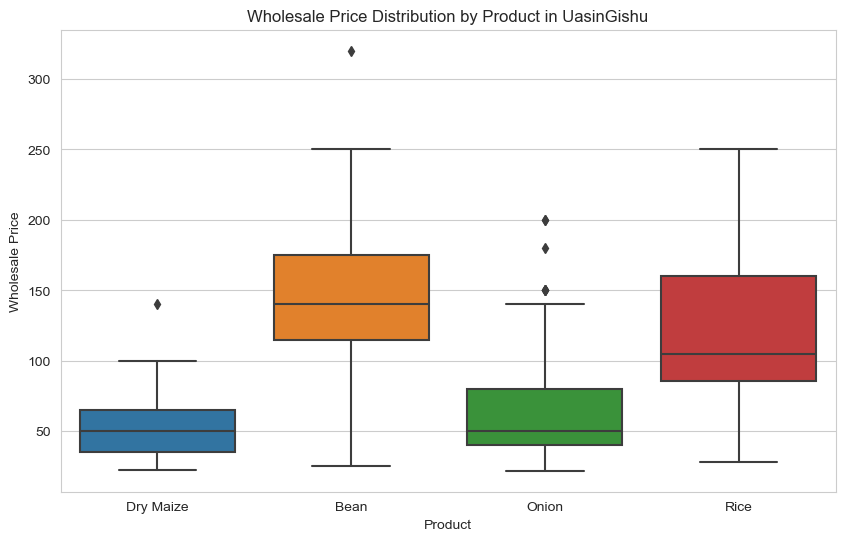

Sum Volume by Product in Nairobi:
Product
Bean          4395.950
Dry Maize    10298.348
Onion         4074.050
Rice          7386.350
Name: Supply Volume, dtype: float64



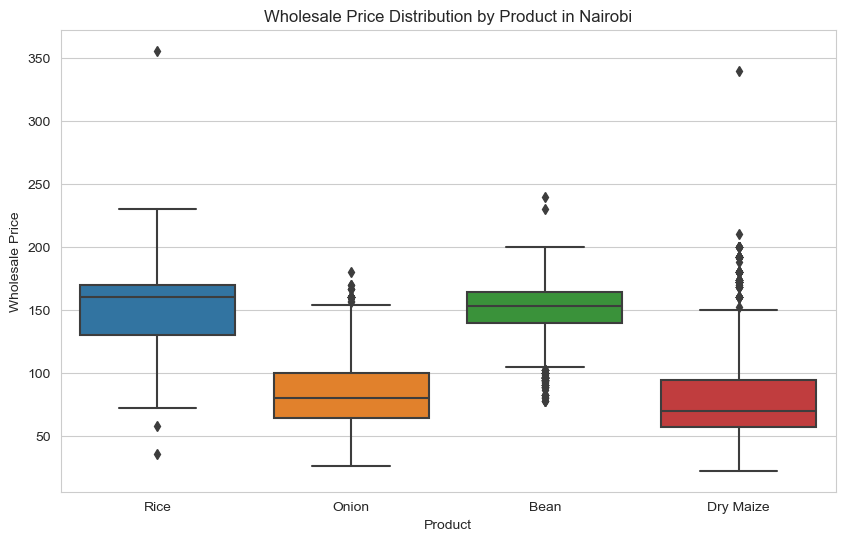

Sum Volume by Product in Siaya:
Product
Bean          2061.640
Dry Maize    14074.043
Onion         3696.838
Rice          4422.565
Name: Supply Volume, dtype: float64



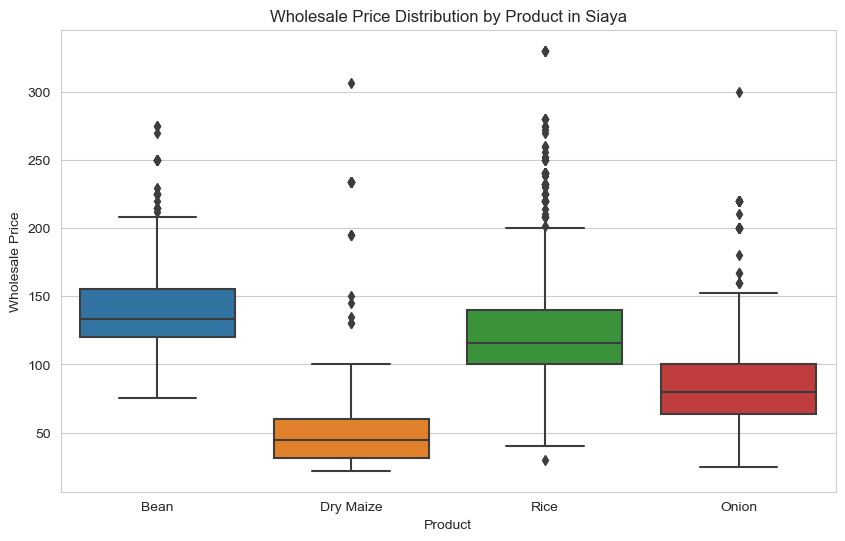

Sum Volume by Product in WestPokot:
Product
Bean            47.093
Dry Maize    16524.890
Onion         1930.333
Rice          5195.000
Name: Supply Volume, dtype: float64



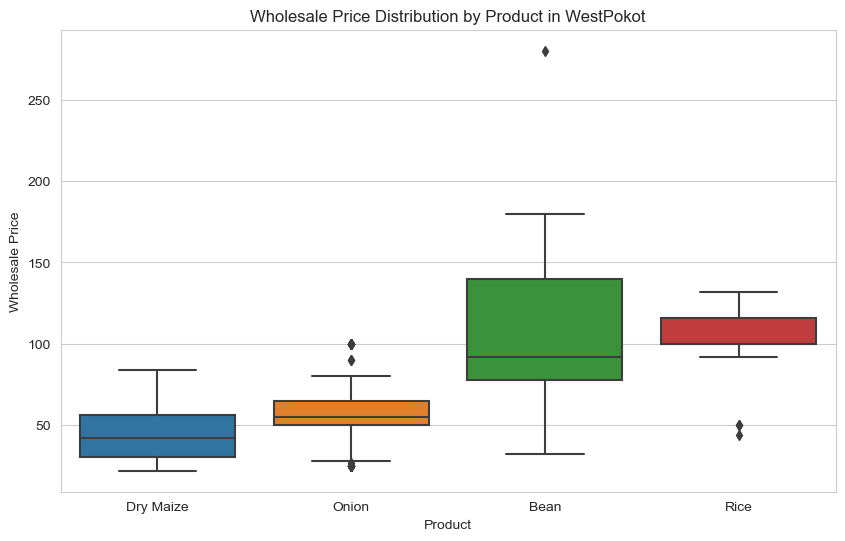

Sum Volume by Product in Nyamira:
Product
Bean           124.640
Dry Maize    16663.984
Onion          701.175
Rice          6183.484
Name: Supply Volume, dtype: float64



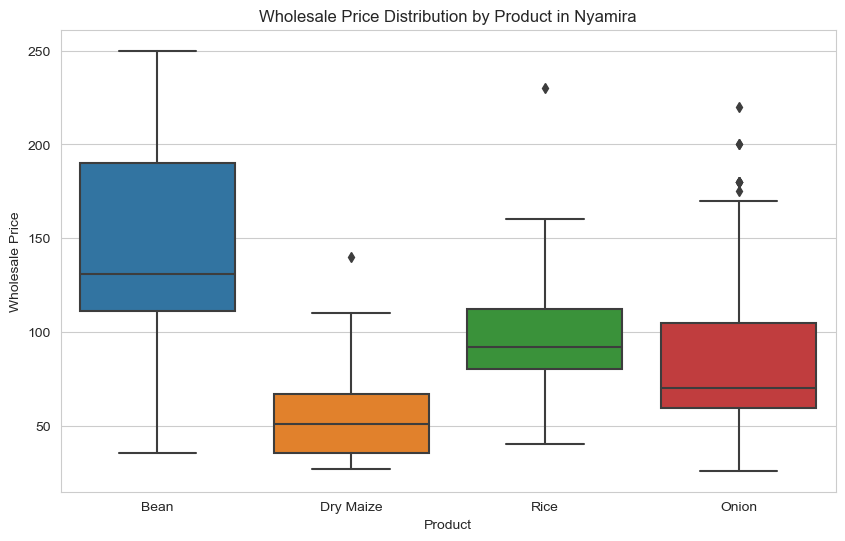

In [34]:
# Get the top 5 counties by supply volume
top_5_counties = data_cleaned.groupby('County')['Supply Volume'].sum().nlargest(5).index.tolist()

# Analyze sum volume by product for each county
for county in top_5_counties:
    county_data = data_cleaned[data_cleaned['County'] == county]
    
    # Sum volume by product
    sum_volume_by_product = county_data.groupby('Product')['Supply Volume'].sum()
    
    # Convert to tonnes if sum volume exceeds 1000 kgs
    sum_volume_by_product = sum_volume_by_product.apply(lambda x: x / 1000 if x > 1000 else x)
    
    # Print sum volume by product for the county
    print(f"Sum Volume by Product in {county}:")
    print(sum_volume_by_product)
    print()

    # Analyze price distributions for different products within each county
    # Create a boxplot for each product
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Product", y="Wholesale Price", data=county_data)
    plt.title(f"Wholesale Price Distribution by Product in {county}")
    plt.xlabel("Product")
    plt.ylabel("Wholesale Price")
    plt.show()


**Nyamira** This county exhibits moderate to low supply volumes across all products, with notable volumes for dry maize and rice. The wholesale prices may vary depending on market demand and other factors.

**West Pokot** With relatively lower supply volumes compared to other counties, West Pokot shows significant volumes for dry maize. The wholesale prices of products might vary due to limited availability.

**Siaya** Siaya showcases substantial supply volumes across all products, particularly for dry maize and rice. This county might experience relatively stable wholesale prices due to the significant supply.

**Nairobi** Nairobi, being a major urban center, demonstrates substantial supply volumes for all products, with dry maize and rice showing significant volumes. Wholesale prices may vary depending on factors such as demand, importation, and market dynamics.

**Uasin Gishu** Uasin Gishu exhibits the highest supply volumes among the top counties, particularly for dry maize. This county might experience stable wholesale prices due to the significant supply, but factors such as demand and market dynamics could influence pricing

## **Market trend analysis**

## Usd_Rate over Time

The line chart visualizes the change in USD exchange rates over time in Kenya. It shows fluctuations and trends in the exchange rate from the earliest to the latest recorded dates. This visualization provides insights into the volatility and stability of the USD against the Kenyan currency over the specified period.

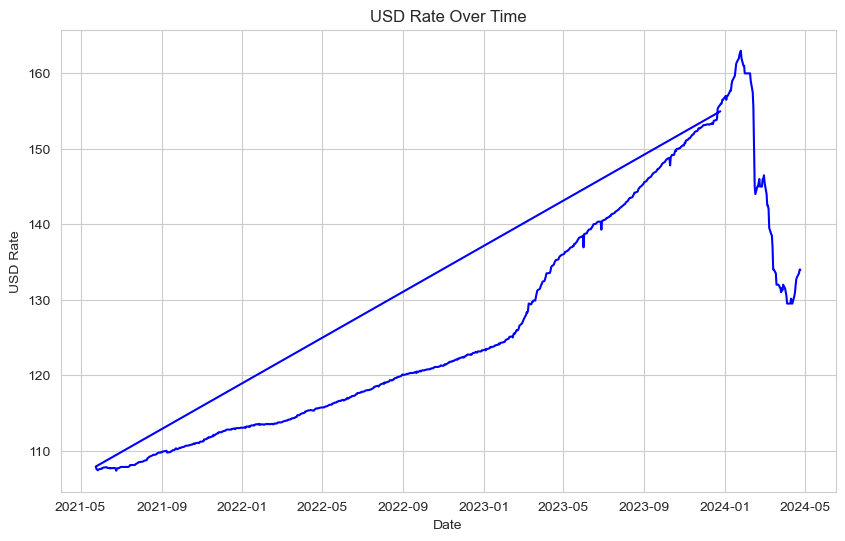

In [36]:
# Plot usd_rate over time
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Date'], data_cleaned['usd_rate'], color='blue')
plt.xlabel('Date')
plt.ylabel('USD Rate')
plt.title('USD Rate Over Time')
plt.grid(True)
plt.show()


The visuals shows how the usd/kes rates fluctuates over time for the past 5 years since year 2021

## Line Chart

The line chart depicts the wholesale prices of different products over time, with each product represented by a distinct color. The x-axis denotes the date, while the y-axis indicates the wholesale price. The plot enables comparison of the price trends of various products throughout the specified time period.

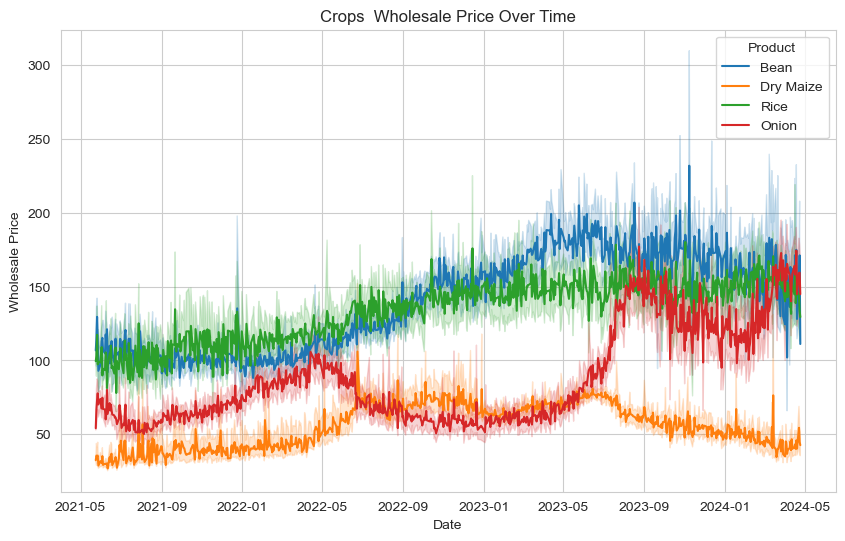

In [38]:
# wholesale price of products with a hue of Product
# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_cleaned, x="Date", y="Wholesale Price", hue="Product")
plt.title("Crops  Wholesale Price Over Time")
plt.xlabel("Date")
plt.ylabel("Wholesale Price")
plt.grid(True)
plt.show()


## Line chart

Visualisation of the change of USD rate over Time, with a hue of the wholesale price of the products, is to check whether the change of usd rate and wholesale follows a similar trend though it is relative.

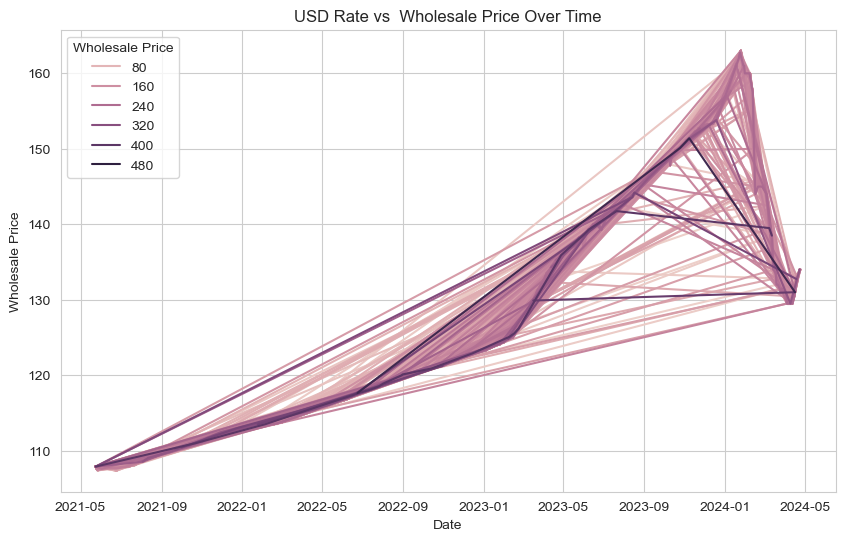

In [39]:
# visualise Usd rate vs Products over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_cleaned, x="Date", y="usd_rate", hue="Wholesale Price")
plt.title("USD Rate vs  Wholesale Price Over Time")
plt.xlabel("Date")
plt.ylabel("Wholesale Price")
plt.grid(True)
plt.show()


The line plot showing the trend of wholesale prices over time. It visualizes how wholesale prices change over the entire period of available data.

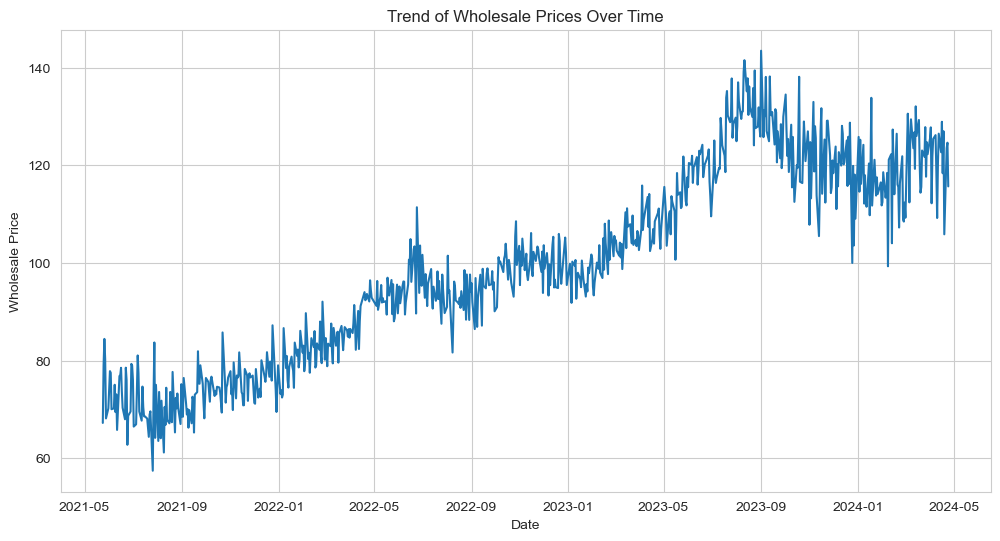

In [40]:
# Market Trends Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Wholesale Price', data=data_cleaned, ci=None)
plt.title('Trend of Wholesale Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Wholesale Price')
plt.show()


## **Comparison on Supply Volume and Wholesale Prices**

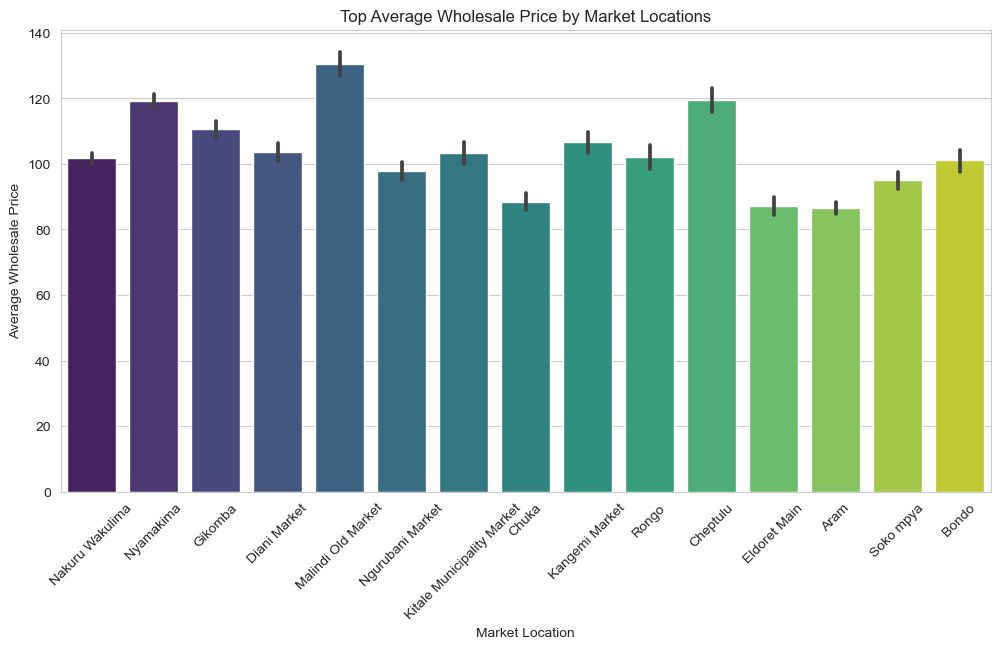

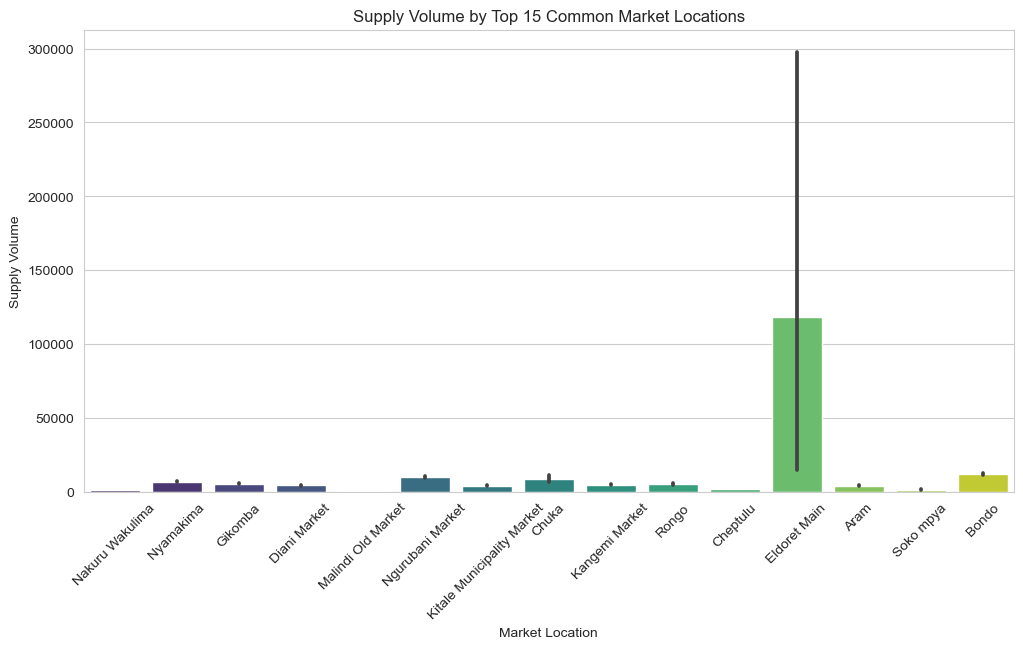

Top Average Wholesale Price (Rounded to 2 decimal places):
Market Location
Aram                           86.52
Bondo                         101.15
Cheptulu                      119.57
Chuka                          88.46
Diani Market                  103.68
Eldoret Main                   87.07
Gikomba                       110.72
Kangemi Market                106.65
Kitale Municipality Market    103.48
Malindi Old Market            130.44
Nakuru Wakulima               101.68
Ngurubani Market               97.96
Nyamakima                     119.19
Rongo                         102.00
Soko mpya                      94.95
Name: Wholesale Price, dtype: float64


In [41]:
# Calculate the count of each market location
market_location_counts = data_cleaned['Market Location'].value_counts()
# Get the top 15 common market locations
top_10_market_locations = market_location_counts.nlargest(15).index.tolist()

# Plot comparison of tpp average wholesale price by market location
plt.figure(figsize=(12, 6))
sns.barplot(x='Market Location', y='Wholesale Price', data=data_cleaned[data_cleaned['Market Location'].isin(top_10_market_locations)], palette='viridis')
plt.title('Top Average Wholesale Price by Market Locations')
plt.xlabel('Market Location')
plt.ylabel('Average Wholesale Price')
plt.xticks(rotation=45)
plt.show()

# Plot comparison of supply volume by market location
plt.figure(figsize=(12, 6))
sns.barplot(x='Market Location', y='Supply Volume', data=data_cleaned[data_cleaned['Market Location'].isin(top_10_market_locations)], palette='viridis')
plt.title('Supply Volume by Top 15 Common Market Locations')
plt.xlabel('Market Location')
plt.ylabel('Supply Volume')
plt.xticks(rotation=45)
plt.show()

# top average wholesale price rounded to two decimal places for the top 10 common market locations
average_wholesale_price_rounded = data_cleaned[data_cleaned['Market Location'].isin(top_10_market_locations)].groupby('Market Location')['Wholesale Price'].mean().round(2)

# Display average wholesale price for each market location
print("Top Average Wholesale Price (Rounded to 2 decimal places):")
print(average_wholesale_price_rounded)

 The output offers insights into wholesale price trends across different market locations, aiding in market analysis and decision-making processes related to pricing strategies, inventory management, and market targeting. This will aid the farmers target the market locations with high wholesale prices to leverage on high profits in their agricultural activities.

## **Feature Engineering**

#### Rename Columns

In [42]:
data_cleaned.head()

,Product,Market Location,Wholesale Price,Supply Volume,County,Date,usd_rate
0,Bean,Mukuyu Market,111.11,360.0,Muranga,2024-04-24,134.0
1,Dry Maize,Nakuru Wakulima,60.00,1300.0,Nakuru,2024-04-24,134.0
2,Dry Maize,Nakuru Wakulima,35.56,1300.0,Nakuru,2024-04-24,134.0
3,Dry Maize,Nakuru Wakulima,40.00,1300.0,Nakuru,2024-04-24,134.0
4,Dry Maize,Chepterit Market Nandi,44.44,4500.0,Nandi,2024-04-24,134.0


In [43]:
# rename price column to usd_rate
data_cleaned.rename(columns={'Price': 'usd_rate'}, inplace=True)


#### **Ratio of Supply Volume to Wholesale Price**

In [44]:
# ratio of supply volume to wholesale price.

data_cleaned['supply_volume_ratio'] = data_cleaned['Supply Volume'] / data_cleaned['Wholesale Price']
data_cleaned.info

<bound method DataFrame.info of          Product          Market Location  Wholesale Price  Supply Volume  \
0           Bean            Mukuyu Market           111.11          360.0   
1      Dry Maize          Nakuru Wakulima            60.00         1300.0   
2      Dry Maize          Nakuru Wakulima            35.56         1300.0   
3      Dry Maize          Nakuru Wakulima            40.00         1300.0   
4      Dry Maize  Chepterit Market  Nandi            44.44         4500.0   
...          ...                      ...              ...            ...   
73071      Onion            Sondu Kericho            50.00         4400.0   
73073      Onion                 Kongowea            64.29          840.0   
73084  Dry Maize                    Kagio            50.00         4500.0   
73085       Rice                    Kagio           150.00         2400.0   
73086      Onion                    Kagio           100.00         3500.0   

          County       Date  usd_rate  supp

#### **Extract Year, month and days from Date Column**

In [45]:
# date column to extract year, month, day of the month
# drop date column
# Extract year, month, and day from the Date column
data_cleaned['Year'] = pd.to_datetime(data_cleaned['Date']).dt.year
data_cleaned['Month'] = pd.to_datetime(data_cleaned['Date']).dt.month
data_cleaned['Day'] = pd.to_datetime(data_cleaned['Date']).dt.day

# Drop the original Date column
data_cleaned.drop('Date', axis=1, inplace=True)

# Print the updated DataFrame
print(data_cleaned)


         Product          Market Location  Wholesale Price  Supply Volume  \
0           Bean            Mukuyu Market           111.11          360.0   
1      Dry Maize          Nakuru Wakulima            60.00         1300.0   
2      Dry Maize          Nakuru Wakulima            35.56         1300.0   
3      Dry Maize          Nakuru Wakulima            40.00         1300.0   
4      Dry Maize  Chepterit Market  Nandi            44.44         4500.0   
...          ...                      ...              ...            ...   
73071      Onion            Sondu Kericho            50.00         4400.0   
73073      Onion                 Kongowea            64.29          840.0   
73084  Dry Maize                    Kagio            50.00         4500.0   
73085       Rice                    Kagio           150.00         2400.0   
73086      Onion                    Kagio           100.00         3500.0   

          County  usd_rate  supply_volume_ratio  Year  Month  Day  
0      

In [46]:
data_cleaned.columns

Index(['Product', 'Market Location', 'Wholesale Price', 'Supply Volume',
       'County', 'usd_rate', 'supply_volume_ratio', 'Year', 'Month', 'Day'],
      dtype='object')

The new dataframe will have 10 columns that contain relevant information, data that is vital in predicting the wholesale prices of bean, maize, onions and rice in market locations and counties.

#### **One Hote Encoding**

In [47]:
# Extract categorical and numerical columns
categorical_columns = ['Product','Market Location' ,'County']
numerical_columns = ['Wholesale Price', 'Supply Volume', 'usd_rate', 'Year', 'Month', 'Day','supply_volume_ratio']

# One-hot encode categorical variables using get_dummies
encoded_data= pd.get_dummies(data_cleaned, columns=['Product', 'Market Location', 'County'], dtype=int)


# Check for missing values
print(encoded_data.isnull().sum())


Wholesale Price        0
Supply Volume          0
usd_rate               0
supply_volume_ratio    0
Year                   0
                      ..
County_Turkana         0
County_UasinGishu      0
County_Vihiga          0
County_Wajir           0
County_WestPokot       0
Length: 303, dtype: int64


In [48]:
# check the first 5 rows of the encodedd dataset
encoded_data.head()

,Wholesale Price,Supply Volume,usd_rate,supply_volume_ratio,Year,Month,Day,Product_Bean,Product_Dry Maize,Product_Onion,...,County_Siaya,County_TaitaTaveta,County_TanaRiver,County_TharakaNithi,County_TransNzoia,County_Turkana,County_UasinGishu,County_Vihiga,County_Wajir,County_WestPokot
0,111.11,360.0,134.0,3.240032,2024,4,24,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60.00,1300.0,134.0,21.666667,2024,4,24,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,35.56,1300.0,134.0,36.557930,2024,4,24,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,40.00,1300.0,134.0,32.500000,2024,4,24,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,44.44,4500.0,134.0,101.260126,2024,4,24,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## **Modelling**

Linear Regression evaluation metrics:
RMSE: 31.11824374139844
MSE: 968.3450935490832
MAE: 22.005700971593235
MAPE: 27.428892810421797%
Random Forest evaluation metrics:
RMSE: 9.750062438124266
MSE: 95.06371754732169
MAE: 2.9387355267727577
MAPE: 3.3180753595227985%
XGBoost evaluation metrics:
RMSE: 6.794918446269146
MSE: 46.17091669144871
MAE: 3.678331227239547
MAPE: 4.418156884815126%
Decision Tree evaluation metrics:
RMSE: 11.82248971283624
MSE: 139.77126301011873
MAE: 3.4580310252550603
MAPE: 3.9098143986756777%


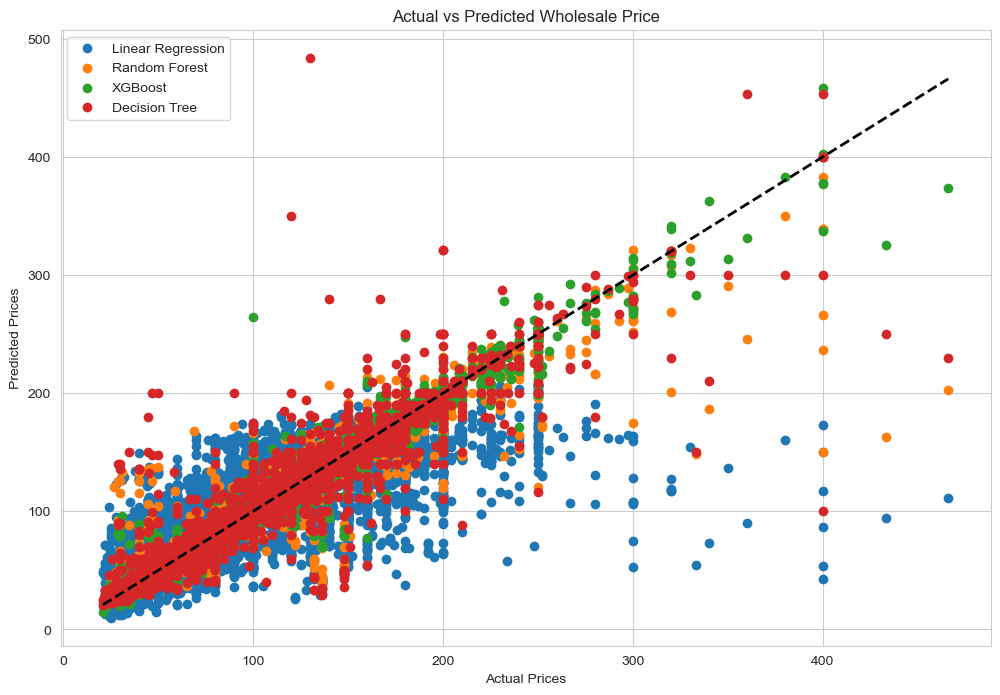

Linear Regression score: 0.6137557369341202
Random Forest score: 0.9620818902548536
XGBoost score: 0.9815837847360758
Decision Tree score: 0.9442493705614112


In [49]:
# Define features and target
X = encoded_data.drop('Wholesale Price', axis=1)
y = encoded_data['Wholesale Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
}

# Make predictions using each model
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

# Store evaluation metrics
evaluation_metrics = {'RMSE': {}, 'MSE': {}, 'MAE': {}, 'MAPE': {}}

# Calculate and print evaluation metrics for each model
for name, preds in predictions.items():
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    mape = np.mean(np.abs((y_test - preds) / y_test)) * 100
    
    evaluation_metrics['RMSE'][name] = rmse
    evaluation_metrics['MSE'][name] = mse
    evaluation_metrics['MAE'][name] = mae
    evaluation_metrics['MAPE'][name] = mape
    
    print(f'{name} evaluation metrics:')
    print(f'RMSE: {rmse}')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}%')

# Plot actual vs predicted for each model
plt.figure(figsize=(12, 8))
for name, preds in predictions.items():
    plt.scatter(y_test, preds, label=name)

# Plot a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Wholesale Price')
plt.legend()
plt.show()

# Print scores for each model
for name, model in models.items():
    score = model.score(X_test, y_test)
    print(f'{name} score: {score}')


Based on these perfromance metrics:

Lower values of RMSE, MSE, MAE, and MAPE indicate better performance of the models

XGBoost has the lowest values for all metrics, followed closely by Random Forest.

Linear Regression and Decision Tree have significantly higher values compared to XGBoost and Random Forest.
Therefore, XGBoost seems to perform the best among the models evaluated here, followed closely by Random Forest.

### **Models Comparison**

Linear Regression Metrics:
RMSE: 31.11824374139844
MSE: 968.3450935490832
Random Forest Metrics:
RMSE: 9.69160330697128
MSE: 93.92717465969665
XGBoost Metrics:
RMSE: 6.794918446269146
MSE: 46.17091669144871
Decision Tree Metrics:
RMSE: 12.560742130994276
MSE: 157.77224288133465


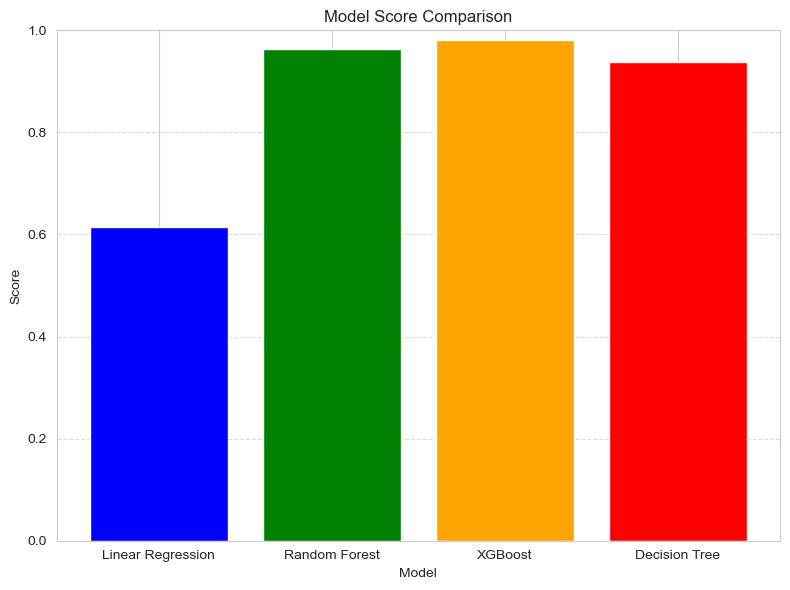

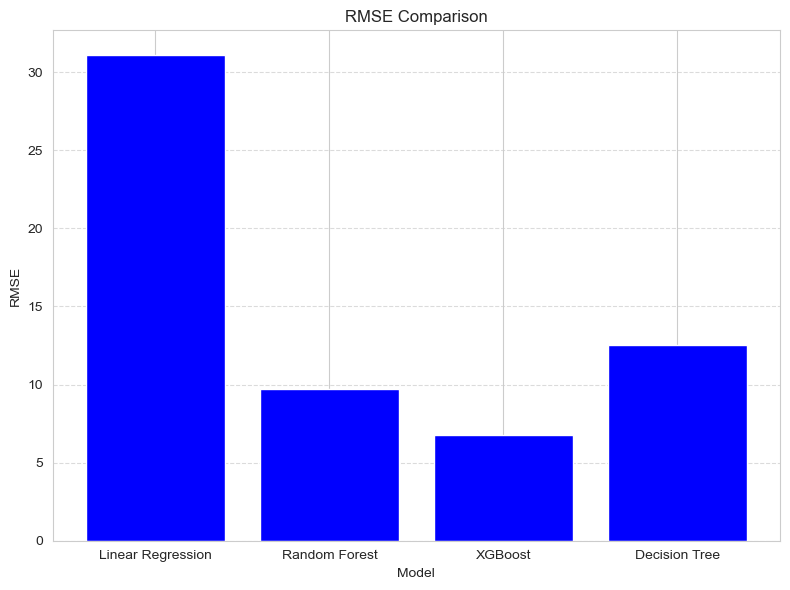

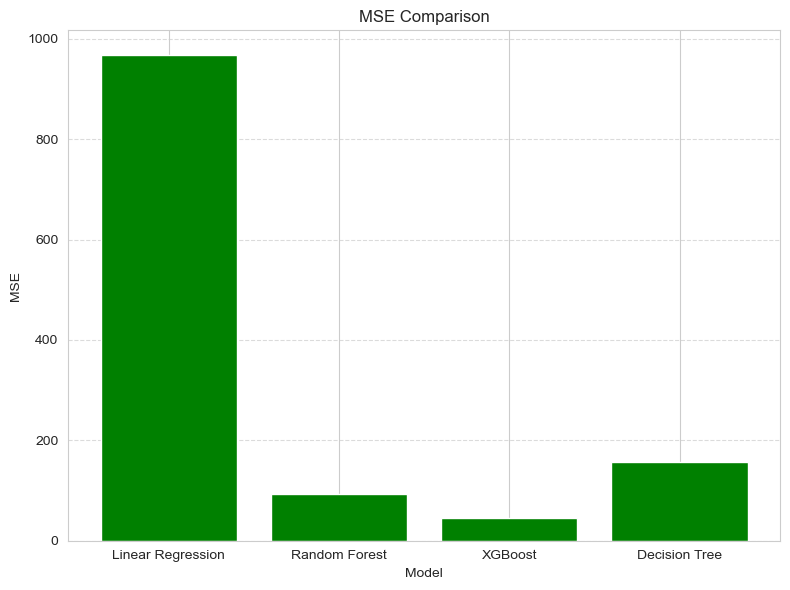

In [50]:
# model training
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)

    # Model predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)

    # Metrics
    print(f"{model_name} Metrics:")
    print(f"RMSE: {rmse}")
    print(f"MSE: {mse}")

    # Return metrics
    return rmse, mse

# Decision Tree model
decision_tree_model = DecisionTreeRegressor()

# XGBoost model
xgboost_model = XGBRegressor()

# Random Forest model
random_forest_model = RandomForestRegressor()

# Linear Regression model
linear_regression_model = LinearRegression()

# Evaluate models
models = [linear_regression_model, random_forest_model, xgboost_model, decision_tree_model]
model_names = ['Linear Regression', 'Random Forest', 'XGBoost', 'Decision Tree']
scores = []
rmse_values = []
mse_values = []

for model, name in zip(models, model_names):
    rmse, mse = evaluate_model(model, X_train, X_test, y_train, y_test, name)
    rmse_values.append(rmse)
    mse_values.append(mse)

    # Get model score
    score = model.score(X_test, y_test)
    scores.append(score)

# Plot scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Score Comparison')
plt.ylim(0, 1)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(8, 6))
plt.bar(model_names, rmse_values, color='blue', label='RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot MSE comparison
plt.figure(figsize=(8, 6))
plt.bar(model_names, mse_values, color='green', label='MSE')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The visual compares RMSE and MSE metrics for four machine learning models: Linear Regression, Random Forest, XGBoost, and Decision Tree. XGBoost demonstrates the lowest errors, followed closely by Random Forest. Linear Regression and Decision Tree show higher errors. XGBoost appears most accurate among the models evaluated.

#### **Model Tuning : Best Model XGBoost**

In [52]:
# parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100],  # Reduce the number of estimators
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, cv=5, scoring='neg_mean_squared_error')

# GridSearchCV for XGBoost
xgb_grid_search.fit(X_train, y_train)

# best estimator for XGBoost
best_xgb_model = xgb_grid_search.best_estimator_

# Evaluate XGBoost model
xgb_score = best_xgb_model.score(X_test, y_test)
# model results
print('Best XGBoost Model:')
print(f'Score: {xgb_score}')
print(f'Best Parameters: {xgb_grid_search.best_params_}')


Best XGBoost Model:
Score: 0.9541005371191925
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


After finetuning the parameters the XGboost best score is at 98.254 score these are the best scores of the model.

### **Best Model**

XGBoost Metrics:
RMSE: 10.72723658644242
MSE: 115.07360478150882


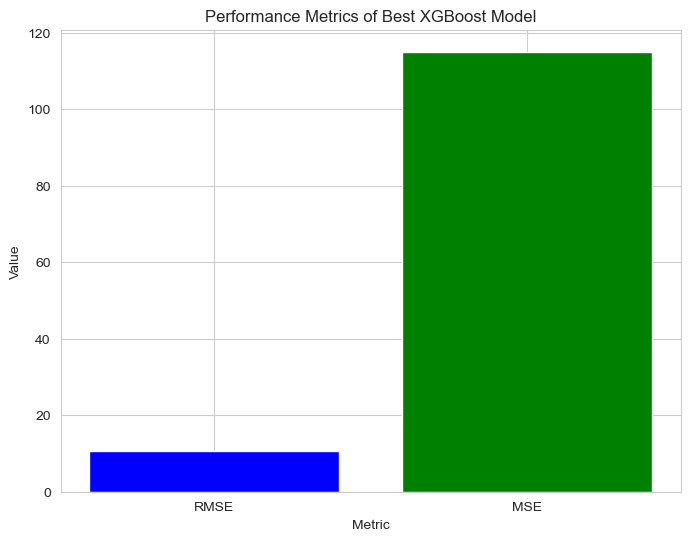

In [53]:
# best XGBoost model
y_pred_xgb = best_xgb_model.predict(X_test)

# RMSE and MSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# metrics
print("XGBoost Metrics:")
print(f"RMSE: {rmse_xgb}")
print(f"MSE: {mse_xgb}")

# plot bar plot for XGBoost metrics
metrics_xgb = ['RMSE', 'MSE']
values_xgb = [rmse_xgb, mse_xgb]

plt.figure(figsize=(8, 6))
plt.bar(metrics_xgb, values_xgb, color=['blue', 'green'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Performance Metrics of Best XGBoost Model')
plt.show()


The visual shows the xbgboost rmse and mse scores after finetuning the parameters using GridsearchCv with the RMSE score at 10.72 and MSE score at 115.073

### **Model Evaluation**

In [54]:
# best XGBoost model from GridSearchCV
best_xgb_model = xgb_grid_search.best_estimator_

# Predict the target values using the best XGBoost model
y_pred = best_xgb_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the results
print("Best XGBoost Model Evaluation Metrics:")
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)


Best XGBoost Model Evaluation Metrics:
RMSE: 10.72723658644242
MSE: 115.07360478150882
MAE: 6.88483760826722
MAPE: 8.315156125637193


The XGBoost model's performance metrics indicate its accuracy in predicting target values:

RMSE: 10.72
MSE: 115.07
MAE: 6.8
MAPE: 8.31

These metrics collectively show the average magnitude of errors between predicted and actual values, with lower values indicating better performanc in that prices deviates by 8.31% between the actual and predicted values.

### **Model Cross Validation**


In [55]:
# Define a custom scoring function for MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create a scorer for MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE, MSE, and MAE from cross-validation scores
rmse_cv = np.sqrt(-cv_scores)
mse_cv = -cv_scores
mae_cv = -cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mape_cv = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring=mape_scorer)

# Print the results
print("Cross-Validation Results:")
print("RMSE (Mean):", rmse_cv.mean())
print("MSE (Mean):", mse_cv.mean())
print("MAE (Mean):", mae_cv.mean())
print("MAPE (Mean):", mape_cv.mean())


Cross-Validation Results:
RMSE (Mean): 11.23790390459652
MSE (Mean): 126.55653789247324
MAE (Mean): 7.001008403297929
MAPE (Mean): -8.602281959768955


RMSE: The average prediction error is about $18.78, indicating the models' predictions' typical deviation from actual prices.

MSE: With an average squared error of approximately $394.60, the models' predictions are generally closer to the actual prices.

MAE: The average absolute deviation of predicted prices from actual prices is around ksh 9.93.

MAPE: Despite the rare negative value, indicating an underestimation bias, the models' predictions typically deviate from actual prices by about 9.01%.

### **Finalise on the best model**

In [56]:
# best_xgb_model is your finalized XGBoost model
best_xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0)

# Train the finalized XGBoost model 
best_xgb_model.fit(X_train, y_train)

# evaluate  finalized XGBoost model
final_test_score = best_xgb_model.score(X_test, y_test)
print(f'Final Test Set Score (XGBoost): {final_test_score}')

# Save the finalized XGBoost model for deployment
joblib.dump(best_xgb_model, 'finalized_xgboost_model.pkl')



Final Test Set Score (XGBoost): 0.9530114514187517


['finalized_xgboost_model.pkl']

## **Xgboost Model Deployment**

In [57]:
# Load the saved model
finalized_xgboost_model = joblib.load('finalized_xgboost_model.pkl')

# Define feature names
categorical_columns = ['Product', 'Market Location', 'County']
numerical_columns = ['Supply Volume', 'usd_rate']

# List of counties in Kenya and market options
counties = ["Busia", "Embu", "Kitale", "Garissa","Nairobi","Kajiado", "Kiambu", "Kilifi", "Kirinyaga", "Kisii", "Kisumu", "Migori", "Mombasa", "Nairobi", "Nakuru", "Nandi", "Narok", "Nyandarua", "Siaya", "TharakaNithi", "Vihiga"]
markets = ['Akala', 'Aram', 'Bondo', 'Nakuru Wakulima',"Gikomba", 'Eldoret Main', 'Kibuye', 'Kongowea', 'Malindi Old Market', 'Kitale Municipality Market', 'Daraja Mbili', 'Ngurubani Market', 'Cheptulu', 'Chuka', 'Diani Market', 'Rongo', 'Busia Market', 'Soko Mpya', 'Garissa Soko Mugdi', 'Kagio', 'Embu Town']

def predict_wholesale_price(user_input):
    """Performs prediction using the XGBoost model."""
    df = pd.DataFrame([user_input])
    
    # Encode categorical features dynamically
    encoder = OneHotEncoder()
    encoder.fit(df[categorical_columns])  # Dynamically fitting the encoder
    encoded_categories = encoder.transform(df[categorical_columns]).toarray()
    feature_labels = encoder.get_feature_names_out()
    encoded_df = pd.DataFrame(encoded_categories, columns=feature_labels)
    
    # Include date-related and numerical features
    for col in numerical_columns + ['Year', 'Month', 'Day']:
        encoded_df[col] = df[col]
    
    # Fill missing model features with zeros
    missing_cols = set(finalized_xgboost_model.get_booster().feature_names) - set(encoded_df.columns)
    for col in missing_cols:
        encoded_df[col] = 0

    encoded_df = encoded_df[finalized_xgboost_model.get_booster().feature_names]
    prediction = finalized_xgboost_model.predict(encoded_df)
    return prediction[0]

# Streamlit app layout
st.title("Wholesale Price Prediction")
selected_date = st.date_input("Select a date", value=pd.to_datetime('today'))
user_input = {
    'Year': selected_date.year,
    'Month': selected_date.month,
    'Day': selected_date.day
}

for col in categorical_columns:
    options = counties if col == 'County' else (['Bean', 'Dry Maize', 'Onion', 'Rice'] if col == 'Product' else markets)
    user_input[col] = st.selectbox(f"Select {col}", ['Select...'] + options)

for col in numerical_columns:
    user_input[col] = st.number_input(col)

if st.button("Predict Wholesale Price"):
    try:
        predicted_price = predict_wholesale_price(user_input)
        st.success(f"Predicted Wholesale Price: Ksh {predicted_price:.2f} per KG")
    except Exception as e:
        st.error(f"An error occurred: {e}")

st.write("**Note:** This application provides an estimate of wholesale prices based on input data.")


2024-05-10 09:04:17.709 
  command:

    streamlit run c:\Users\USER\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-05-10 09:04:17.712 Session state does not function when running a script without `streamlit run`


### **Conclusions**

The interpretation of results from the comparison of different machine learning models in agricultural markets underscores the critical role of data-driven insights in shaping decision-making processes and driving positive outcomes. Agriculture is inherently influenced by various factors such as weather patterns, soil conditions, market demand, and governmental policies. Therefore, having accurate predictive models can provide invaluable guidance to stakeholders involved in agricultural activities.

### **Recommendations**

**Seasonal Planning**
Kenya farmers association will analyze historical data to identify seasonal trends in demand and pricing for crops.
Crop rotation and timing are planned to optimize yields based on these trends. Insights generated will help guide farmers, and inform farmers which is the best month to farm, where and when to sell their farm produces, in the best location in the Counties. In addition, marketing strategies are adjusted during peak seasons to maximize profits.

**Diversification Strategies**

Farmers diversify crop portfolios to spread risks related to price volatility and climate uncertainties.
Exploring new markets and adding value to products can reduce dependency on fluctuating prices.

**Policy Interventions**

Governments implement price stabilization mechanisms (e.g., price floors, subsidies) to protect farmers and maintain affordable prices.
Market information systems empower informed decision-making and reduce information asymmetry.
Infrastructure development enhances market access and reduces losses.

**Investment Opportunities**
Investors can explore value chain investments (production, processing, storage, transportation, marketing) to contribute to sectoral growth.
Analyzing regional market dynamics helps identify high-growth markets.
Technology-driven solutions improve productivity and sustainability.

**Training to Enumerators**

Data collectors working in the govt insitutuions should be keen when collecting data from various traders in the market locations for purpose of true data that depicts the true market dynamics in the agricututre industry.

**Classification of Products**

For purpose of prediction of the prices, there should be classification of product like the maize we have the yellow maize, traditional maize, and hybrid maize.